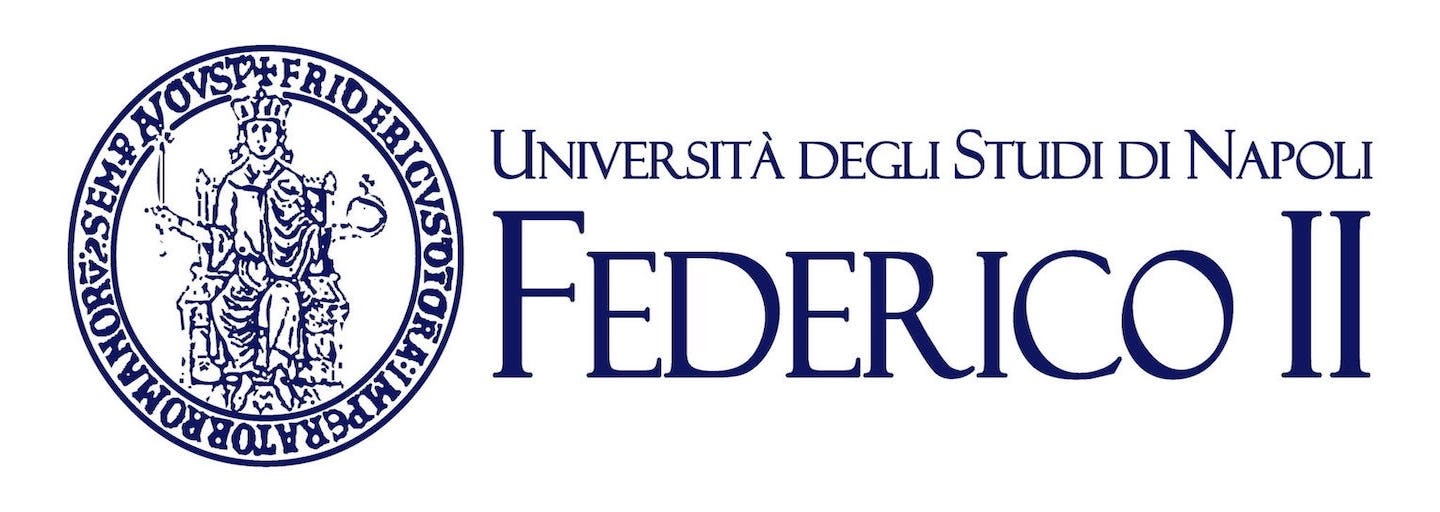
***

## Data Mining Final Project(Fake News and Real News Detection) - MOD - B
## Prof.ROBERTA SICILIANO and Prof.GIUSEPPE LONGO 

Team Members : 
1. MAVILLAPALLI VENKATA TARUN KUMAR (P37000126)
2. GATTEM PRIYA MADHURI (P37000162)
3. KARRI RAHUL REDDY (P37000157)

Data Source Website - "https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/" - Detecting Fake News 

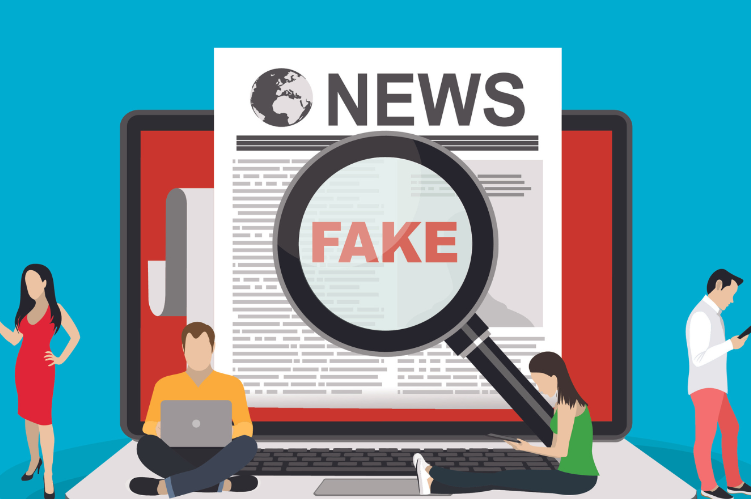

### **Problem Statement for Fake News Detection Project**  

#### **Title**:  
**Automated Detection of Fake News Using Traditional and Deep Learning Models**  

#### **Problem Overview**:  
The rapid spread of misinformation and fake news on digital platforms has led to serious societal consequences, including political manipulation, public misinformation, and social unrest. Manually verifying news articles is impractical due to the vast volume of online content. Therefore, **automated fake news detection** using machine learning and deep learning techniques is a crucial step toward mitigating misinformation.  

#### **Objective**:  
This project aims to **develop and compare various machine learning and deep learning models** for detecting fake news. Using a dataset of fake and real news articles, we explore multiple **text representation techniques** (TF-IDF, GloVe embeddings) and a range of classification models, from **traditional algorithms (Logistic Regression, Random Forest) to advanced deep learning models (LSTM, CNN, BERT)**.  

#### **Challenges Addressed**:  
1. **Text Representation**: Converting unstructured textual data into numerical features using **TF-IDF and word embeddings (GloVe, Transformers)**.  
2. **Model Selection**: Evaluating the performance of traditional models (**Logistic Regression, Random Forest**) vs. deep learning architectures (**CNN, LSTM, BERT**) for fake news classification.  
3. **Semantic Understanding**: Testing **pre-trained word embeddings** (GloVe) and **context-aware models** (BERT) to improve classification accuracy.  
4. **Generalization**: Ensuring that the model can **detect fake news in unseen articles**, rather than just memorizing dataset-specific patterns.  
5. **Interpretability vs. Performance**: Comparing interpretable models (**Logistic Regression, Random Forest**) with complex but high-performing models (**Transformers, BERT**) to balance accuracy and explainability.  

#### **Expected Impact**:  
- Automating **fake news detection** to reduce misinformation spread.  
- Enhancing **news credibility verification systems** using AI.  
- Providing insights into **linguistic patterns and common fake news triggers** using association rule mining and NLP techniques.  



#### ***Importing Necessary Libraries***

In [2]:
### Core Libraries
# 1. General Purpose
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

### TensorFlow and Keras
# 2. TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

### Scikit-Learn
# 3. Scikit-Learn for Model Building and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import joblib
from scikeras.wrappers import KerasClassifier

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import textstat
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams, pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy

# Download required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
# Load spaCy model


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/venkatatarunkumarmavillapalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/venkatatarunkumarmavillapalli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/venkatatarunkumarmavillapalli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [320]:
# Load tùhe dataset
df_cleaned = pd.read_csv('/Users/venkatatarunkumarmavillapalli/Desktop/data/new_cleaned.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              6162 non-null   object 
 1   text               6162 non-null   object 
 2   label              6162 non-null   object 
 3   title_length       6162 non-null   int64  
 4   text_length        6162 non-null   int64  
 5   article            6162 non-null   object 
 6   article_length     6162 non-null   int64  
 7   title_sentiment    6162 non-null   float64
 8   text_sentiment     6162 non-null   float64
 9   article_sentiment  6162 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 481.5+ KB


In [322]:
df_real_co_occurance = pd.read_csv("/Users/venkatatarunkumarmavillapalli/Desktop/data/top_cooccurrences_real4.csv")
df_real_co_occurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394158 entries, 0 to 1394157
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   count   1394158 non-null  int64
dtypes: int64(1)
memory usage: 10.6 MB


In [324]:
df_fake_co_occurance = pd.read_csv("/Users/venkatatarunkumarmavillapalli/Desktop/data/top_cooccurrences_fake4.csv")
df_fake_co_occurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895242 entries, 0 to 895241
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   count   895242 non-null  int64
dtypes: int64(1)
memory usage: 6.8 MB


In [326]:
df_real_ner = pd.read_csv("/Users/venkatatarunkumarmavillapalli/Desktop/data/real_ner_news.csv")
df_real_ner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28327 entries, 0 to 28326
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entity        28327 non-null  object
 1   Label         28327 non-null  object
 2   Count of NER  28327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 664.0+ KB


In [328]:
df_fake_ner = pd.read_csv("/Users/venkatatarunkumarmavillapalli/Desktop/data/fake_ner_news.csv")
df_fake_ner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24086 entries, 0 to 24085
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entity        24086 non-null  object
 1   Label         24086 non-null  object
 2   Count of NER  24086 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 564.6+ KB


In [330]:
df_real_association = pd.read_csv("/Users/venkatatarunkumarmavillapalli/Desktop/data/real_ass.csv")
df_real_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75552 entries, 0 to 75551
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          75552 non-null  int64  
 1   antecedents         75552 non-null  object 
 2   consequents         75552 non-null  object 
 3   antecedent support  75552 non-null  float64
 4   consequent support  75552 non-null  float64
 5   support             75552 non-null  float64
 6   confidence          75552 non-null  float64
 7   lift                75552 non-null  float64
 8   leverage            75552 non-null  float64
 9   conviction          75552 non-null  float64
 10  zhangs_metric       75552 non-null  float64
 11  antecedents_length  75552 non-null  int64  
 12  consequents_length  75552 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 7.5+ MB


In [332]:
df_fake_association = pd.read_csv("/Users/venkatatarunkumarmavillapalli/Desktop/data/fake_ass.csv")
df_fake_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          568 non-null    int64  
 1   antecedents         568 non-null    object 
 2   consequents         568 non-null    object 
 3   antecedent support  568 non-null    float64
 4   consequent support  568 non-null    float64
 5   support             568 non-null    float64
 6   confidence          568 non-null    float64
 7   lift                568 non-null    float64
 8   leverage            568 non-null    float64
 9   conviction          568 non-null    float64
 10  zhangs_metric       568 non-null    float64
 11  antecedents_length  568 non-null    int64  
 12  consequents_length  568 non-null    int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 57.8+ KB


In [337]:
# Create a new dataframe for features
df_features = df_cleaned[['title', 'text', 'label', 'title_length', 'text_length', 
                          'article_length', 'title_sentiment', 'text_sentiment', 
                          'article_sentiment']].copy()

In [339]:
# 1. TEXT COMPLEXITY FEATURES
def extract_text_complexity_features(row):
    text = row['text']
    title = row['title']
    full_article = row['article'] if 'article' in row else f"{title} {text}"
    
    # Readability scores
    flesch_score = textstat.flesch_reading_ease(full_article)
    smog_index = textstat.smog_index(full_article)
    
    # Tokenization
    sentences = sent_tokenize(full_article)
    words = word_tokenize(full_article)
    unique_words = set(words)
    
    # Vocabulary richness
    vocab_richness = len(unique_words) / len(words) if words else 0
    
    # Average sentence length
    avg_sent_length = np.mean([len(word_tokenize(s)) for s in sentences]) if sentences else 0
    
    # Punctuation counts
    exclamation_count = full_article.count('!')
    question_count = full_article.count('?')
    quotation_count = full_article.count('"') + full_article.count("'")
    
    # Numbers and capitalization
    number_count = sum(c.isdigit() for c in full_article)
    capital_ratio = sum(1 for c in full_article if c.isupper()) / len(full_article) if full_article else 0
    
    # Word length statistics
    word_lengths = [len(w) for w in words if w.isalpha()]
    avg_word_length = np.mean(word_lengths) if word_lengths else 0
    
    return pd.Series({
        'flesch_score': flesch_score,
        'smog_index': smog_index,
        'vocab_richness': vocab_richness,
        'avg_sent_length': avg_sent_length,
        'exclamation_count': exclamation_count,
        'question_count': question_count,
        'quotation_count': quotation_count,
        'number_count': number_count,
        'capital_ratio': capital_ratio,
        'avg_word_length': avg_word_length
    })

# Apply text complexity features
text_complexity_features = df_features.apply(extract_text_complexity_features, axis=1)
df_features = pd.concat([df_features, text_complexity_features], axis=1)


- The function extract_text_complexity_features calculates readability, vocabulary, sentence, punctuation, and capitalization features from text or article data.
- It applies this function to each row in the df_features DataFrame, extracting and computing the relevant text complexity features.
- The results are stored as new columns in df_features, extending the dataframe with these calculated features.

In [341]:
# 2. EMOTIONAL LANGUAGE FEATURES
def extract_emotional_features(row):
    text = row['text']
    sia = SentimentIntensityAnalyzer()
    
    # Get sentiment scores
    sentiment = sia.polarity_scores(text)
    
    # Calculate emotional words
    # These are basic lists, you might want to use more comprehensive emotion lexicons
    positive_words = ['good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic']
    negative_words = ['bad', 'terrible', 'awful', 'horrible', 'poor', 'worst']
    uncertain_words = ['maybe', 'perhaps', 'possibly', 'allegedly', 'reportedly', 'supposedly']
    
    words = re.findall(r'\b\w+\b', text.lower())
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    uncertain_count = sum(1 for word in words if word in uncertain_words)
    
    # Calculate proportions
    total_words = len(words)
    positive_ratio = positive_count / total_words if total_words else 0
    negative_ratio = negative_count / total_words if total_words else 0
    uncertain_ratio = uncertain_count / total_words if total_words else 0
    
    return pd.Series({
        'positive_ratio': positive_ratio,
        'negative_ratio': negative_ratio,
        'uncertain_ratio': uncertain_ratio,
        'sentiment_neg': sentiment['neg'],
        'sentiment_neu': sentiment['neu'],
        'sentiment_pos': sentiment['pos'],
        'sentiment_compound': sentiment['compound'],
        'sentiment_extremity': abs(sentiment['compound'])
    })

# Apply emotional language features
emotional_features = df_features.apply(extract_emotional_features, axis=1)
df_features = pd.concat([df_features, emotional_features], axis=1)

- The function extract_emotional_features calculates sentiment scores using the SentimentIntensityAnalyzer and counts the occurrences of positive, negative, and uncertain words from a predefined list in the text.
- It then calculates the proportions of these word categories and adds sentiment scores (negative, neutral, positive, compound, and extremity) to the dataframe.
- Finally, the apply method is used to apply this function to each row of the dataframe, and the resulting features are concatenated to the original dataframe.

In [343]:
# 3. CO-OCCURRENCE FEATURES 
# Create features based on the co-occurrence dataframes

# Get the most common co-occurrences from real news
real_top_cooccur = df_real_co_occurance.sort_values('count', ascending=False).head(100)
# Get the most common co-occurrences from fake news
fake_top_cooccur = df_fake_co_occurance.sort_values('count', ascending=False).head(100)

# Assuming the co-occurrence dataframes have columns 'word_pair' and 'count'
# If they have different structure, modify this part accordingly
def extract_cooccurrence_distribution(df_cooccur):
    """Extract statistical distribution features from co-occurrence dataframe"""
    counts = df_cooccur['count'].values
    
    return {
        'cooccur_mean': np.mean(counts),
        'cooccur_median': np.median(counts),
        'cooccur_std': np.std(counts),
        'cooccur_max': np.max(counts),
        'cooccur_min': np.min(counts),
        'cooccur_unique_pairs': len(df_cooccur),
        'cooccur_total_count': np.sum(counts)
    }

# Extract co-occurrence statistics by label
real_cooccur_stats = extract_cooccurrence_distribution(df_real_co_occurance)
fake_cooccur_stats = extract_cooccurrence_distribution(df_fake_co_occurance)

# Function to map these statistics to individual articles
def map_cooccur_features(row):
    if row['label'] == 'REAL':
        return pd.Series(real_cooccur_stats)
    else:
        return pd.Series(fake_cooccur_stats)

# Apply co-occurrence features
cooccur_features = df_features.apply(map_cooccur_features, axis=1)
df_features = pd.concat([df_features, cooccur_features], axis=1)


- The code computes statistical distribution features (mean, median, std, max, min, etc.) from co-occurrence data of words in real and fake news.
- It then applies these computed statistics to each article based on its label (REAL or FAKE) by mapping these statistics to the df_features dataframe.
- Finally, it concatenates the new co-occurrence features into the df_features dataframe.

In [345]:
# 4. NAMED ENTITY FEATURES from NER dataframes
# Calculate NER statistics for real and fake news separately

# Function to calculate NER type distributions
def calculate_ner_distributions(df_ner):
    total_entities = len(df_ner)
    if total_entities == 0:
        return {}
    
    # Count by entity type
    entity_type_counts = df_ner['Label'].value_counts().to_dict()
    
    # Calculate ratios
    entity_type_ratios = {f"ner_{key.lower()}_ratio": val/total_entities 
                          for key, val in entity_type_counts.items()}
    
    # Get entity diversity (unique entities / total)
    unique_entities = len(df_ner['Entity'].unique())
    entity_diversity = unique_entities / total_entities
    
    # Add overall stats
    entity_type_ratios['ner_entity_diversity'] = entity_diversity
    entity_type_ratios['ner_total_entities'] = total_entities
    entity_type_ratios['ner_unique_entities'] = unique_entities
    
    return entity_type_ratios

# Calculate NER statistics for real and fake news
real_ner_stats = calculate_ner_distributions(df_real_ner)
fake_ner_stats = calculate_ner_distributions(df_fake_ner)

# Map NER features to articles
def map_ner_features(row):
    if row['label'] == 'REAL':
        return pd.Series(real_ner_stats)
    else:
        return pd.Series(fake_ner_stats)

# Apply NER features
ner_features = df_features.apply(map_ner_features, axis=1)
df_features = pd.concat([df_features, ner_features], axis=1)

The code is calculating Named Entity Recognition (NER) statistics for two separate datasets (real and fake news). It computes entity type distributions, ratios, diversity, and overall counts, then maps these statistics to each article based on its label (REAL or FAKE). Finally, it concatenates the NER features to the original dataframe (df_features).

In [347]:
# 5. ASSOCIATION RULE FEATURES
# Extract statistics from association rule mining results

def calculate_association_stats(df_assoc):
    """Calculate statistics from association rules dataframe"""
    if len(df_assoc) == 0:
        return {}
    
    stats = {
        'assoc_rule_count': len(df_assoc),
        'assoc_avg_confidence': df_assoc['confidence'].mean(),
        'assoc_med_confidence': df_assoc['confidence'].median(),
        'assoc_avg_lift': df_assoc['lift'].mean(),
        'assoc_med_lift': df_assoc['lift'].median(),
        'assoc_avg_support': df_assoc['support'].mean(),
        'assoc_med_support': df_assoc['support'].median(),
        'assoc_high_lift_rules': sum(df_assoc['lift'] > 2),  # Count of rules with lift > 2
        'assoc_high_conf_rules': sum(df_assoc['confidence'] > 0.8)  # Count of rules with confidence > 0.8
    }
    
    return stats

# Calculate association rule statistics
real_assoc_stats = calculate_association_stats(df_real_association)
fake_assoc_stats = calculate_association_stats(df_fake_association)

# Map association rule features to articles
def map_association_features(row):
    if row['label'] == 'REAL':
        return pd.Series(real_assoc_stats)
    else:
        return pd.Series(fake_assoc_stats)

# Apply association rule features
assoc_features = df_features.apply(map_association_features, axis=1)
df_features = pd.concat([df_features, assoc_features], axis=1)


In [348]:
df_features = df_features.fillna(0)

In [349]:
df_features

,title,text,label,title_length,text_length,article_length,title_sentiment,text_sentiment,article_sentiment,flesch_score,...,ner_work_of_art_ratio,assoc_rule_count,assoc_avg_confidence,assoc_med_confidence,assoc_avg_lift,assoc_med_lift,assoc_avg_support,assoc_med_support,assoc_high_lift_rules,assoc_high_conf_rules
0,smell hillary fear,daniel greenfield shillman journalism fellow ...,FAKE,19,4973,4993,-0.4939,-0.9991,-0.9992,-652.91,...,0.001121,568.0,0.573976,0.577714,1.398244,1.347713,0.225452,0.217084,18.0,22.0
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE,76,1795,1872,-0.5267,0.8887,0.7968,-211.05,...,0.001121,568.0,0.573976,0.577714,1.398244,1.347713,0.225452,0.217084,18.0,22.0
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,REAL,31,1762,1794,0.3612,0.7845,0.8555,-212.06,...,0.000671,75552.0,0.577246,0.566520,1.398286,1.314495,0.223140,0.215282,2634.0,8281.0
3,bernie supporter twitter erupt anger dnc we t...,kaydee king kaydeeking november lesson ...,FAKE,57,1985,2043,-0.4588,0.2878,-0.2110,-232.03,...,0.001121,568.0,0.573976,0.577714,1.398244,1.347713,0.225452,0.217084,18.0,22.0
4,battle new york primary matter,s primary day new york frontrunners hillary cl...,REAL,31,1258,1290,-0.3612,0.9779,0.9738,-131.87,...,0.000671,75552.0,0.577246,0.566520,1.398286,1.314495,0.223140,0.215282,2634.0,8281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,state department say ca nt find email clinton ...,state department told republican national comm...,REAL,56,2975,3032,0.0000,0.6369,0.6369,-378.52,...,0.000671,75552.0,0.577246,0.566520,1.398286,1.314495,0.223140,0.215282,2634.0,8281.0
6158,p pb stand plutocratic pentagon,p pb stand plutocratic pentagon posted o...,FAKE,37,10559,10597,0.0000,-0.9972,-0.9972,-1312.33,...,0.001121,568.0,0.573976,0.577714,1.398244,1.347713,0.225452,0.217084,18.0,22.0
6159,antitrump protester tool oligarchy information,antitrump protester tool oligarchy reform alwa...,FAKE,47,8285,8333,0.0000,-0.9965,-0.9965,-1057.56,...,0.001121,568.0,0.573976,0.577714,1.398244,1.347713,0.225452,0.217084,18.0,22.0
6160,ethiopia obama seek progress peace security ...,addis ababa ethiopia president obama convened...,REAL,57,5034,5092,0.8271,0.9910,0.9937,-640.06,...,0.000671,75552.0,0.577246,0.566520,1.398286,1.314495,0.223140,0.215282,2634.0,8281.0


In [315]:
# Save the final features dataset
#df_features.to_csv('/Users/venkatatarunkumarmavillapalli/Desktop/data/news_features_engineered_complete.csv', index=False)

In [350]:
print(f"Total features: {df_features.shape[1]}")
print(f"Total samples: {df_features.shape[0]}")
df_features.info()

Total features: 64
Total samples: 6162
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6162 non-null   object 
 1   text                   6162 non-null   object 
 2   label                  6162 non-null   object 
 3   title_length           6162 non-null   int64  
 4   text_length            6162 non-null   int64  
 5   article_length         6162 non-null   int64  
 6   title_sentiment        6162 non-null   float64
 7   text_sentiment         6162 non-null   float64
 8   article_sentiment      6162 non-null   float64
 9   flesch_score           6162 non-null   float64
 10  smog_index             6162 non-null   float64
 11  vocab_richness         6162 non-null   float64
 12  avg_sent_length        6162 non-null   float64
 13  exclamation_count      6162 non-null   float64
 14  question_count   

# Preprocessing


- Text Columns (title and text)
- Combine title and text into a single column (e.g., "title + ' ' + text") for a unified representation.

In [311]:
df = pd.read_csv('/Users/venkatatarunkumarmavillapalli/Desktop/data/news_features_engineered_complete.csv')
df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6162 non-null   object 
 1   text                   6162 non-null   object 
 2   label                  6162 non-null   object 
 3   title_length           6162 non-null   int64  
 4   text_length            6162 non-null   int64  
 5   article_length         6162 non-null   int64  
 6   title_sentiment        6162 non-null   float64
 7   text_sentiment         6162 non-null   float64
 8   article_sentiment      6162 non-null   float64
 9   flesch_score           6162 non-null   float64
 10  smog_index             6162 non-null   float64
 11  vocab_richness         6162 non-null   float64
 12  avg_sent_length        6162 non-null   float64
 13  exclamation_count      6162 non-null   float64
 14  question_count         6162 non-null   float64
 15  quot

Numerical Columns:- 
All 52 numerical columns are non-null and ready to use.- 

Standardize them to ensure consistent scas


In [9]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.drop(columns=['title', 'text', 'label', 'combined_text']).columns

# Reduced numerical features
numerical_cols = [
    'title_length', 'text_length', 'article_length', 'flesch_score', 'smog_index',
    'vocab_richness', 'avg_sent_length', 'exclamation_count', 'question_count',
    'quotation_count', 'number_count', 'capital_ratio', 'avg_word_length'
]

scaler = StandardScaler()
numerical_features = scaler.fit_transform(df[numerical_cols])
print("Numerical Features Shape:", numerical_features.shape)  # Should be (n_samples, 13)

# Label: Convert label to binary (e.g., "fake" = 0, "real" = 1)

df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})  # Adjust mapping based on your data

df

Numerical Features Shape: (6162, 13)


,title,text,label,title_length,text_length,article_length,title_sentiment,text_sentiment,article_sentiment,flesch_score,...,ner_org_ratio,ner_percent_ratio,ner_person_ratio,ner_product_ratio,ner_quantity_ratio,ner_time_ratio,ner_total_entities,ner_unique_entities,ner_work_of_art_ratio,combined_text
0,smell hillary fear,daniel greenfield shillman journalism fellow ...,0,19,4973,4993,-0.4939,-0.9991,-0.9992,-652.91,...,0.175704,0.012372,0.329154,0.007639,0.022254,0.020676,24086.0,23457.0,0.001121,smell hillary fear daniel greenfield shillma...
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,0,76,1795,1872,-0.5267,0.8887,0.7968,-211.05,...,0.175704,0.012372,0.329154,0.007639,0.022254,0.020676,24086.0,23457.0,0.001121,watch exact moment paul ryan committed politic...
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,1,31,1762,1794,0.3612,0.7845,0.8555,-212.06,...,0.193702,0.020334,0.361740,0.004907,0.016380,0.025100,28327.0,27500.0,0.000671,kerry go paris gesture sympathy u secretary st...
3,bernie supporter twitter erupt anger dnc we t...,kaydee king kaydeeking november lesson ...,0,57,1985,2043,-0.4588,0.2878,-0.2110,-232.03,...,0.175704,0.012372,0.329154,0.007639,0.022254,0.020676,24086.0,23457.0,0.001121,bernie supporter twitter erupt anger dnc we t...
4,battle new york primary matter,s primary day new york frontrunners hillary cl...,1,31,1258,1290,-0.3612,0.9779,0.9738,-131.87,...,0.193702,0.020334,0.361740,0.004907,0.016380,0.025100,28327.0,27500.0,0.000671,battle new york primary matter s primary day ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,state department say ca nt find email clinton ...,state department told republican national comm...,1,56,2975,3032,0.0000,0.6369,0.6369,-378.52,...,0.193702,0.020334,0.361740,0.004907,0.016380,0.025100,28327.0,27500.0,0.000671,state department say ca nt find email clinton ...
6158,p pb stand plutocratic pentagon,p pb stand plutocratic pentagon posted o...,0,37,10559,10597,0.0000,-0.9972,-0.9972,-1312.33,...,0.175704,0.012372,0.329154,0.007639,0.022254,0.020676,24086.0,23457.0,0.001121,p pb stand plutocratic pentagon p pb s...
6159,antitrump protester tool oligarchy information,antitrump protester tool oligarchy reform alwa...,0,47,8285,8333,0.0000,-0.9965,-0.9965,-1057.56,...,0.175704,0.012372,0.329154,0.007639,0.022254,0.020676,24086.0,23457.0,0.001121,antitrump protester tool oligarchy informatio...
6160,ethiopia obama seek progress peace security ...,addis ababa ethiopia president obama convened...,1,57,5034,5092,0.8271,0.9910,0.9937,-640.06,...,0.193702,0.020334,0.361740,0.004907,0.016380,0.025100,28327.0,27500.0,0.000671,ethiopia obama seek progress peace security ...


# TF-IDF Approach

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Unigrams and bigrams

# Fit and transform
tfidf_matrix = tfidf.fit_transform(df['combined_text'])
print(tfidf_matrix.shape)  # Expected: (6162, 5000)

#Combine with Numerical Featuresfrom scipy.sparse import hstack 

# Combine TF-IDF with numerical features
combined_features_tfidf = hstack([tfidf_matrix, numerical_features])
print(combined_features_tfidf.shape)

(6162, 5000)
(6162, 5013)


In [245]:
import pickle

# Save the fitted TF-IDF vectorizer
with open('/Users/venkatatarunkumarmavillapalli/Desktop/models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [247]:
# Save the scaler
with open('/Users/venkatatarunkumarmavillapalli/Desktop/models/numerical_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Word2Vec Approach



In [14]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np

# Tokenize
tokenized_text = df['combined_text'].apply(word_tokenize)

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, workers=4, seed=42)

# Get document vectors
def get_doc_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

w2v_vectors = np.array([get_doc_vector(tokens, w2v_model) for tokens in tokenized_text])
zero_vectors = sum(1 for vec in w2v_vectors if np.all(vec == 0))
print(f"Word2Vec shape: {w2v_vectors.shape}, Zero vectors: {zero_vectors}")

# Combine features
combined_features_w2v = np.hstack([w2v_vectors, numerical_features])
print(f"Combined features shape: {combined_features_w2v.shape}")

Word2Vec shape: (6162, 100), Zero vectors: 0
Combined features shape: (6162, 113)


In [249]:
# Save the Word2Vec model
w2v_model.save('/Users/venkatatarunkumarmavillapalli/Desktop/models/word2vec_model.bin')

# Modelling

## Logistic Regression - TFIDF

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Features (X) and labels (y)
X = combined_features_tfidf
y = df['label']  # Replace 'df' with your DataFrame name

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(combined_features_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)  # e.g., (4929, 152)
print("Test set shape:", X_test.shape)      # e.g., (1233, 152)

# Initialize the model
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_tfidf.fit(X_train, y_train)

# Check training accuracy
train_accuracy = log_reg_tfidf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Verify the number of features the model expects
print("TF-IDF Model n_features_in_:", log_reg_tfidf.n_features_in_)  # Should be 5013

# Predict and evaluate
y_pred_tfidf = log_reg_tfidf.predict(X_test)
print("TF-IDF Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))

Training set shape: (4929, 5013)
Test set shape: (1233, 5013)
Training Accuracy: 0.9515114627713532
TF-IDF Model n_features_in_: 5013
TF-IDF Logistic Regression Test Accuracy: 0.9302514193025142

Classification Report:
              precision    recall  f1-score   support

        Fake       0.92      0.94      0.93       611
        Real       0.94      0.92      0.93       622

    accuracy                           0.93      1233
   macro avg       0.93      0.93      0.93      1233
weighted avg       0.93      0.93      0.93      1233


Confusion Matrix:
[[576  35]
 [ 51 571]]


In [19]:
# Feature importance
coefficients_tfidf = log_reg_tfidf.coef_[0]
tfidf_feature_names = tfidf.get_feature_names_out()
feature_names_tfidf = list(tfidf_feature_names) + list(numerical_cols)
feature_importance_tfidf = pd.DataFrame({'Feature': feature_names_tfidf, 'Coefficient': coefficients_tfidf})
print("\nTop 10 Positive Coefficients (favoring Real):")
print(feature_importance_tfidf.sort_values(by='Coefficient', ascending=False).head(10))
print("\nTop 10 Negative Coefficients (favoring Fake):")
print(feature_importance_tfidf.sort_values(by='Coefficient').head(10))


Top 10 Positive Coefficients (favoring Real):
           Feature  Coefficient
3856          said     5.765319
2962            nt     3.834556
3705    republican     2.902064
885   conservative     2.628000
1880           gop     2.537834
4209         state     2.436529
2978         obama     2.423091
1025          cruz     2.400164
3906           say     2.316000
1079        debate     2.181145

Top 10 Negative Coefficients (favoring Fake):
       Feature  Coefficient
3001   october    -4.102138
2022   hillary    -3.701724
1364  election    -2.941166
2957  november    -2.605161
4827       war    -2.591704
277    article    -2.550465
4137    source    -2.298049
4020     share    -2.287164
1616       fbi    -2.106813
4938     world    -1.747785


In [21]:
# Only TF-IDF
X_train_tfidf_only, X_test_tfidf_only, y_train, y_test = train_test_split(
    tfidf_matrix, y, test_size=0.2, random_state=42, stratify=y
)
log_reg_tfidf.fit(X_train_tfidf_only, y_train)
print("TF-IDF Only Accuracy:", log_reg_tfidf.score(X_test_tfidf_only, y_test))

# Only Numerical
X_train_num_only, X_test_num_only, y_train, y_test = train_test_split(
    numerical_features, y, test_size=0.2, random_state=42, stratify=y
)
log_reg_tfidf.fit(X_train_num_only, y_train)
print("Numerical Only Accuracy:", log_reg_tfidf.score(X_test_num_only, y_test))

print("\nTop 10 Positive Coefficients (favoring Real):")
print(feature_importance_tfidf.sort_values(by='Coefficient', ascending=False).head(10))
print("\nTop 10 Negative Coefficients (favoring Fake):")
print(feature_importance_tfidf.sort_values(by='Coefficient').head(10))

from sklearn.model_selection import cross_val_score

log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(log_reg_tfidf, combined_features_tfidf, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

TF-IDF Only Accuracy: 0.9221411192214112
Numerical Only Accuracy: 0.6585563665855637

Top 10 Positive Coefficients (favoring Real):
           Feature  Coefficient
3856          said     5.765319
2962            nt     3.834556
3705    republican     2.902064
885   conservative     2.628000
1880           gop     2.537834
4209         state     2.436529
2978         obama     2.423091
1025          cruz     2.400164
3906           say     2.316000
1079        debate     2.181145

Top 10 Negative Coefficients (favoring Fake):
       Feature  Coefficient
3001   october    -4.102138
2022   hillary    -3.701724
1364  election    -2.941166
2957  november    -2.605161
4827       war    -2.591704
277    article    -2.550465
4137    source    -2.298049
4020     share    -2.287164
1616       fbi    -2.106813
4938     world    -1.747785
5-Fold CV Accuracy Scores: [0.91646391 0.91240876 0.92938312 0.92694805 0.91883117]
Mean CV Accuracy: 0.9208070011902129


# word2vec - Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(combined_features_w2v, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
log_reg_w2v = LogisticRegression(max_iter=1000, random_state=42)
log_reg_w2v.fit(X_train, y_train)

# Verify that the model has learned
print("✅ Model trained successfully!")
print("Number of features:", log_reg_w2v.n_features_in_)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict and evaluate
y_pred_w2v = log_reg_w2v.predict(X_test)
print("TF-IDF Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_w2v))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_w2v, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_w2v))

✅ Model trained successfully!
Number of features: 113
TF-IDF Logistic Regression Test Accuracy: 0.9099756690997567

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.91      0.91       611
        Real       0.91      0.91      0.91       622

    accuracy                           0.91      1233
   macro avg       0.91      0.91      0.91      1233
weighted avg       0.91      0.91      0.91      1233


Confusion Matrix:
[[553  58]
 [ 53 569]]


In [25]:
# Feature importance
coefficients_w2v = log_reg_w2v.coef_[0]
w2v_feature_names = [f"w2v_{i}" for i in range(w2v_vectors.shape[1])]
feature_names_w2v = w2v_feature_names + list(numerical_cols)
feature_importance_w2v = pd.DataFrame({'Feature': feature_names_w2v, 'Coefficient': coefficients_w2v})
print("\nTop 10 Positive Coefficients (favoring Real):")
print(feature_importance_w2v.sort_values(by='Coefficient', ascending=False).head(10))
print("\nTop 10 Negative Coefficients (favoring Fake):")
print(feature_importance_w2v.sort_values(by='Coefficient').head(10))

from sklearn.model_selection import cross_val_score

log_reg_w2v = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(log_reg_w2v, combined_features_w2v, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Top 10 Positive Coefficients (favoring Real):
             Feature  Coefficient
64            w2v_64     3.221914
9              w2v_9     2.702616
69            w2v_69     2.281906
106  avg_sent_length     2.100524
63            w2v_63     2.034621
96            w2v_96     1.985664
73            w2v_73     1.926126
60            w2v_60     1.802044
11            w2v_11     1.653967
70            w2v_70     1.433442

Top 10 Negative Coefficients (favoring Fake):
   Feature  Coefficient
68  w2v_68    -2.701231
84  w2v_84    -2.406053
90  w2v_90    -2.150725
55  w2v_55    -2.137878
47  w2v_47    -2.095994
67  w2v_67    -2.006319
87  w2v_87    -1.836926
93  w2v_93    -1.657331
41  w2v_41    -1.631840
39  w2v_39    -1.610760
5-Fold CV Accuracy Scores: [0.89943228 0.90105434 0.91152597 0.90097403 0.89935065]
Mean CV Accuracy: 0.9024674534711032


##  Random Forest - TFIDF

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed from LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (X) and labels (y)
X = combined_features_tfidf
y = df['label']  # Replace 'df' with your DataFrame name

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(combined_features_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)  # e.g., (4929, 152)
print("Test set shape:", X_test.shape)      # e.g., (1233, 152)

# Initialize the Random Forest model
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees by default

# Train the model
rf_tfidf.fit(X_train, y_train)

# Check training accuracy
train_accuracy = rf_tfidf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Verify the number of features the model expects
print("Random Forest Model n_features_in_:", rf_tfidf.n_features_in_)

# Predict and evaluate
y_pred_tfidf = rf_tfidf.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))

# Optional: Feature importance
feature_importance = rf_tfidf.feature_importances_
print("\nTop 10 Feature Importances:")
for i, importance in enumerate(feature_importance[:10]):  # Showing top 10
    print(f"Feature {i}: {importance:.4f}")

Training set shape: (4929, 5013)
Test set shape: (1233, 5013)
Training Accuracy: 1.0
Random Forest Model n_features_in_: 5013
Random Forest Test Accuracy: 0.9180859691808597

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.92      0.92       611
        Real       0.92      0.91      0.92       622

    accuracy                           0.92      1233
   macro avg       0.92      0.92      0.92      1233
weighted avg       0.92      0.92      0.92      1233


Confusion Matrix:
[[565  46]
 [ 55 567]]

Top 10 Feature Importances:
Feature 0: 0.0001
Feature 1: 0.0000
Feature 2: 0.0001
Feature 3: 0.0000
Feature 4: 0.0004
Feature 5: 0.0002
Feature 6: 0.0001
Feature 7: 0.0001
Feature 8: 0.0001
Feature 9: 0.0000


## Random Forest - Word2vec

In [29]:
from sklearn.ensemble import RandomForestClassifier  # Changed from LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(combined_features_w2v, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_w2v = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees by default
rf_w2v.fit(X_train, y_train)

# Verify that the model has learned
print("✅ Model trained successfully!")
print("Number of features:", rf_w2v.n_features_in_)

# Predict and evaluate
y_pred_w2v = rf_w2v.predict(X_test)
print("Random Forest Test Accuracy with Word2Vec:", accuracy_score(y_test, y_pred_w2v))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_w2v, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_w2v))

# Optional: Feature importance
feature_importance = rf_w2v.feature_importances_
print("\nTop 10 Feature Importances:")
for i, importance in enumerate(feature_importance[:10]):  # Showing top 10
    print(f"Feature {i}: {importance:.4f}")

✅ Model trained successfully!
Number of features: 113
Random Forest Test Accuracy with Word2Vec: 0.9042984590429846

Classification Report:
              precision    recall  f1-score   support

        Fake       0.90      0.90      0.90       611
        Real       0.90      0.91      0.91       622

    accuracy                           0.90      1233
   macro avg       0.90      0.90      0.90      1233
weighted avg       0.90      0.90      0.90      1233


Confusion Matrix:
[[551  60]
 [ 58 564]]

Top 10 Feature Importances:
Feature 0: 0.0079
Feature 1: 0.0103
Feature 2: 0.0034
Feature 3: 0.0102
Feature 4: 0.0049
Feature 5: 0.0219
Feature 6: 0.0042
Feature 7: 0.0075
Feature 8: 0.0038
Feature 9: 0.0197


## MLP - TFIDF

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # Changed to MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (X) and labels (y)
X = combined_features_tfidf
y = df['label']  # Replace 'df' with your DataFrame name

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(combined_features_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)  # e.g., (4929, 152)
print("Test set shape:", X_test.shape)      # e.g., (1233, 152)

# Initialize the MLP model
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(50,),  # One hidden layer with 100 neurons
                         max_iter=10, # Maximum number of iterations
                         alpha = 0.01,
                         activation='relu',         # Activation function
                         solver='adam',             # Optimizer
                         random_state=42,
                         verbose=True)             # Shows training progress

# Train the model
mlp_tfidf.fit(X_train, y_train)

# Check training accuracy
train_accuracy = mlp_tfidf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Verify the number of features the model expects
print("MLP Model n_features_in_:", mlp_tfidf.n_features_in_)

# Predict and evaluate
y_pred_tfidf = mlp_tfidf.predict(X_test)
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))

# Optional: Loss curve (if you want to visualize training progress)
print("\nFinal Loss:", mlp_tfidf.loss_)

Training set shape: (4929, 5013)
Test set shape: (1233, 5013)
Iteration 1, loss = 0.64195185
Iteration 2, loss = 0.50318977
Iteration 3, loss = 0.38374530
Iteration 4, loss = 0.29851394
Iteration 5, loss = 0.24485754
Iteration 6, loss = 0.20874594
Iteration 7, loss = 0.18195318
Training Accuracy: 0.9651044836680869
MLP Model n_features_in_: 5013
MLP Test Accuracy: 0.9383617193836172

Classification Report:
              precision    recall  f1-score   support

        Fake       0.94      0.93      0.94       611
        Real       0.93      0.95      0.94       622

    accuracy                           0.94      1233
   macro avg       0.94      0.94      0.94      1233
weighted avg       0.94      0.94      0.94      1233


Confusion Matrix:
[[569  42]
 [ 34 588]]

Final Loss: 0.18195318294241764


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


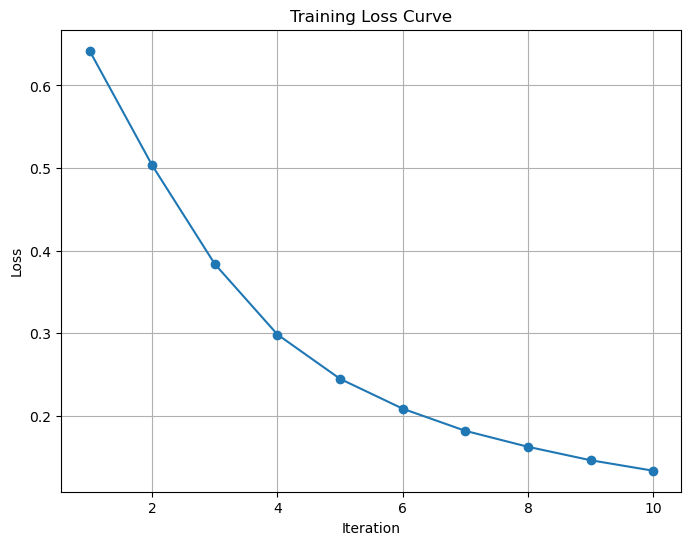

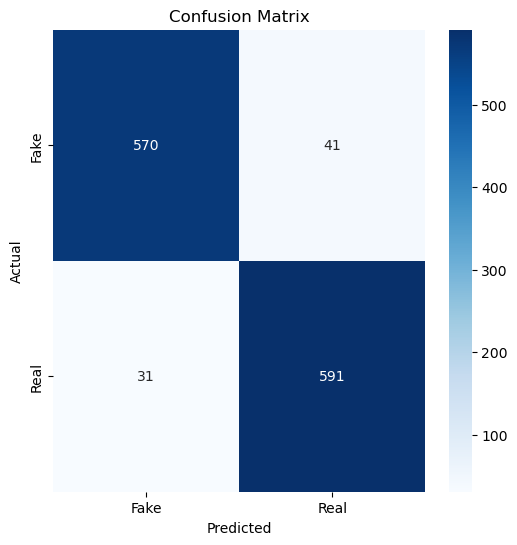

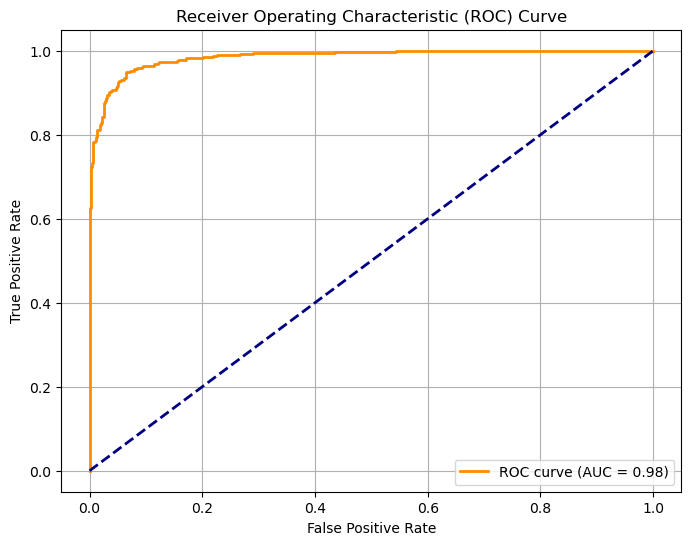

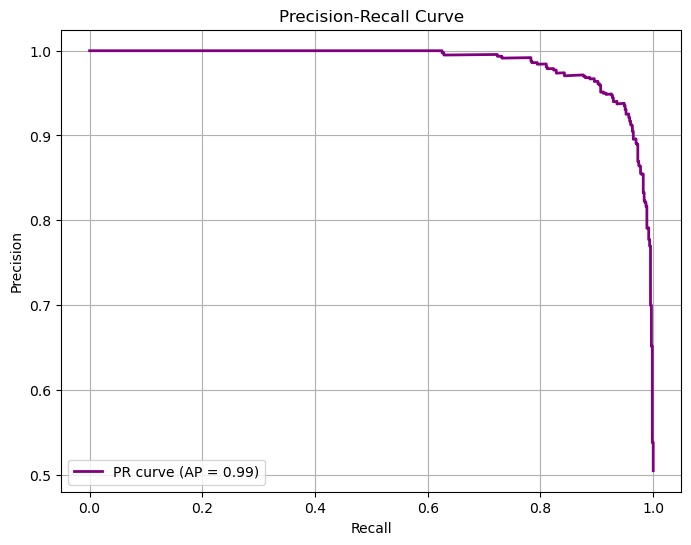

In [61]:
#Loss Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mlp_tfidf.loss_curve_) + 1), mlp_tfidf.loss_curve_, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#Confusion Matrix Heatmap
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve
from sklearn.metrics import roc_curve, auc

y_prob = mlp_tfidf.predict_proba(X_test)[:, 1]  # Probability for 'Real' class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_tfidf, X, y, cv=5)
print("Cross-val scores:", scores, "Mean:", scores.mean())

Iteration 1, loss = 0.64069560
Iteration 2, loss = 0.49967909
Iteration 3, loss = 0.37903440
Iteration 4, loss = 0.29634455
Iteration 5, loss = 0.24354973
Iteration 6, loss = 0.20746396
Iteration 7, loss = 0.18152710
Iteration 8, loss = 0.16202929
Iteration 9, loss = 0.14645796
Iteration 10, loss = 0.13340503
Iteration 1, loss = 0.64114180
Iteration 2, loss = 0.50020899


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.37990034
Iteration 4, loss = 0.29504483
Iteration 5, loss = 0.24051402
Iteration 6, loss = 0.20421353
Iteration 7, loss = 0.17799286
Iteration 8, loss = 0.15817324
Iteration 9, loss = 0.14281568
Iteration 10, loss = 0.12998619


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.64055573
Iteration 2, loss = 0.50038968
Iteration 3, loss = 0.38149108
Iteration 4, loss = 0.29808849
Iteration 5, loss = 0.24407118
Iteration 6, loss = 0.20823154
Iteration 7, loss = 0.18238873
Iteration 8, loss = 0.16221975
Iteration 9, loss = 0.14626523
Iteration 10, loss = 0.13339305
Iteration 1, loss = 0.63852917


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.49591374
Iteration 3, loss = 0.37689970
Iteration 4, loss = 0.29529367
Iteration 5, loss = 0.24250499
Iteration 6, loss = 0.20731852
Iteration 7, loss = 0.18133581
Iteration 8, loss = 0.16166426
Iteration 9, loss = 0.14596203
Iteration 10, loss = 0.13327833
Iteration 1, loss = 0.64013161


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.49750419
Iteration 3, loss = 0.37777958
Iteration 4, loss = 0.29477869
Iteration 5, loss = 0.24209895
Iteration 6, loss = 0.20627971
Iteration 7, loss = 0.18036266
Iteration 8, loss = 0.16090088
Iteration 9, loss = 0.14504378
Iteration 10, loss = 0.13237687
Cross-val scores: [0.93917275 0.92376318 0.93668831 0.93019481 0.9237013 ] Mean: 0.9307040688427548


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## word2vec - MLP

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # Changed to MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (X) and labels (y)
X = combined_features_w2v
y = df['label']  # Replace 'df' with your DataFrame name

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(combined_features_w2v, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)  # e.g., (4929, 152)
print("Test set shape:", X_test.shape)      # e.g., (1233, 152)

# Initialize the MLP model
mlp_w2v = MLPClassifier(hidden_layer_sizes=(50,),  # One hidden layer with 100 neurons
                         max_iter=10, # Maximum number of iterations
                         alpha = 0.01,
                         activation='relu',         # Activation function
                         solver='adam',             # Optimizer
                         random_state=42,
                         verbose=True)             # Shows training progress

# Train the model
mlp_w2v.fit(X_train, y_train)

# Check training accuracy
train_accuracy = mlp_w2v.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Verify the number of features the model expects
print("MLP Model n_features_in_:", mlp_w2v.n_features_in_)

# Predict and evaluate
y_pred_tfidf = mlp_w2v.predict(X_test)
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))

# Optional: Loss curve (if you want to visualize training progress)
print("\nFinal Loss:", mlp_w2v.loss_)

Training set shape: (4929, 113)
Test set shape: (1233, 113)
Iteration 1, loss = 0.53647771
Iteration 2, loss = 0.39917818
Iteration 3, loss = 0.33350562
Iteration 4, loss = 0.29832122
Iteration 5, loss = 0.27795456
Iteration 6, loss = 0.26136955
Iteration 7, loss = 0.25127493
Iteration 8, loss = 0.24314070
Iteration 9, loss = 0.23693725
Iteration 10, loss = 0.23112875
Training Accuracy: 0.9137756137147495
MLP Model n_features_in_: 113
MLP Test Accuracy: 0.9051094890510949

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.90      0.90       611
        Real       0.90      0.91      0.91       622

    accuracy                           0.91      1233
   macro avg       0.91      0.91      0.91      1233
weighted avg       0.91      0.91      0.91      1233


Confusion Matrix:
[[550  61]
 [ 56 566]]

Final Loss: 0.2311287507816853


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


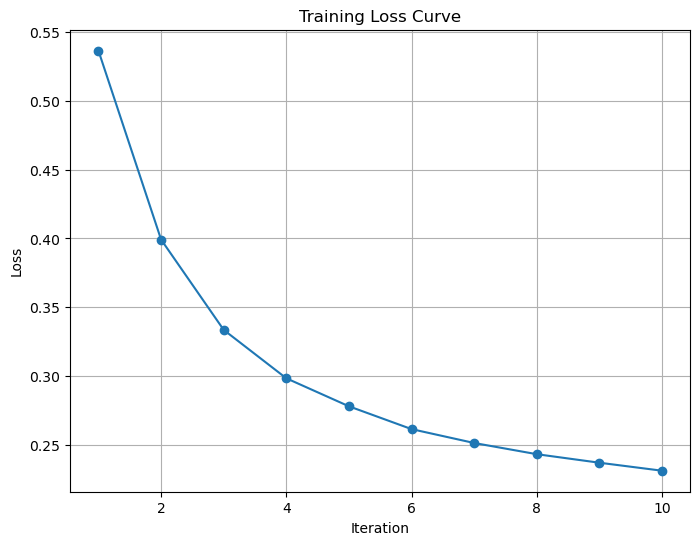

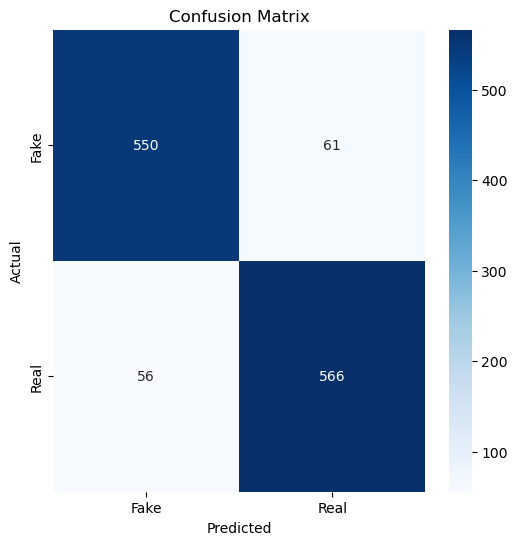

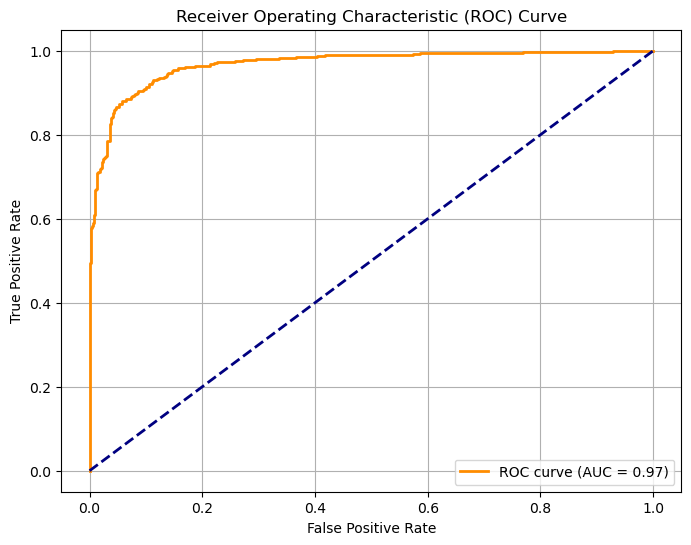

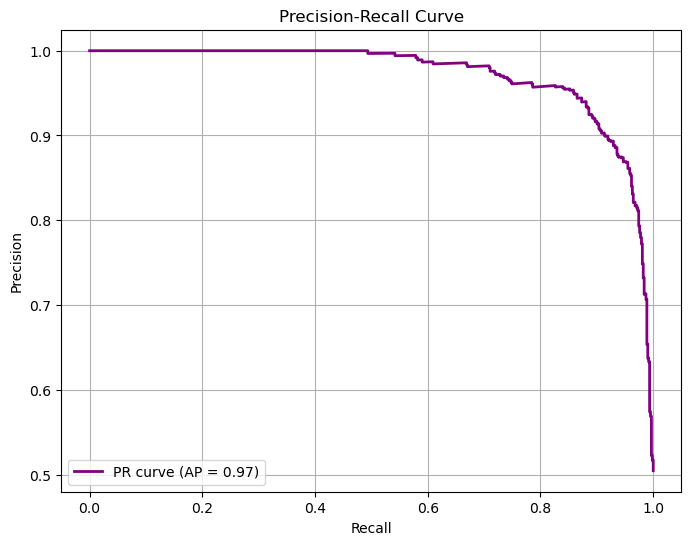

In [65]:
#Loss Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mlp_w2v.loss_curve_) + 1), mlp_w2v.loss_curve_, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#Confusion Matrix Heatmap
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve
from sklearn.metrics import roc_curve, auc

y_prob = mlp_w2v.predict_proba(X_test)[:, 1]  # Probability for 'Real' class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# RNN, LSTM, GRU, BI-RNN, BI-LSTM, BI-GRU ---> TFIDF

In [153]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert sparse TF-IDF features to dense format for TensorFlow
X = combined_features_tfidf.toarray()
y = df['label'].values  # Convert labels to numpy array

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data for RNN-based models (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define model architecture

def build_rnn():
    model = Sequential([
        SimpleRNN(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2])),
        Dropout(0.3),
        SimpleRNN(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_lstm():
    model = Sequential([
        LSTM(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2])),
        Dropout(0.3),
        LSTM(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_gru():
    model = Sequential([
        GRU(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2])),
        Dropout(0.3),
        GRU(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bidir_rnn():
    model = Sequential([
        Bidirectional(SimpleRNN(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2]))),
        Dropout(0.3),
        Bidirectional(SimpleRNN(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bidir_lstm():
    model = Sequential([
        Bidirectional(LSTM(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2]))),
        Dropout(0.3),
        Bidirectional(LSTM(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bidir_gru():
    model = Sequential([
        Bidirectional(GRU(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2]))),
        Dropout(0.3),
        Bidirectional(GRU(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

##  RNN

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7016 - loss: 0.6352 - val_accuracy: 0.8840 - val_loss: 0.4453
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8976 - loss: 0.4294 - val_accuracy: 0.9157 - val_loss: 0.3262
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9316 - loss: 0.3267 - val_accuracy: 0.9278 - val_loss: 0.2751
Training Accuracy: 0.9563806056976318
Test Accuracy: 0.9278183579444885
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.92      0.93      0.93       611
        Real       0.93      0.92      0.93       622

    accuracy                           0.93      1233
   macro avg       0.93      0.93      0.93      1233
weighted avg       0.93      0.93      0.93      1233


Confusion Matrix:
[[569  42]
 [ 47 575]]


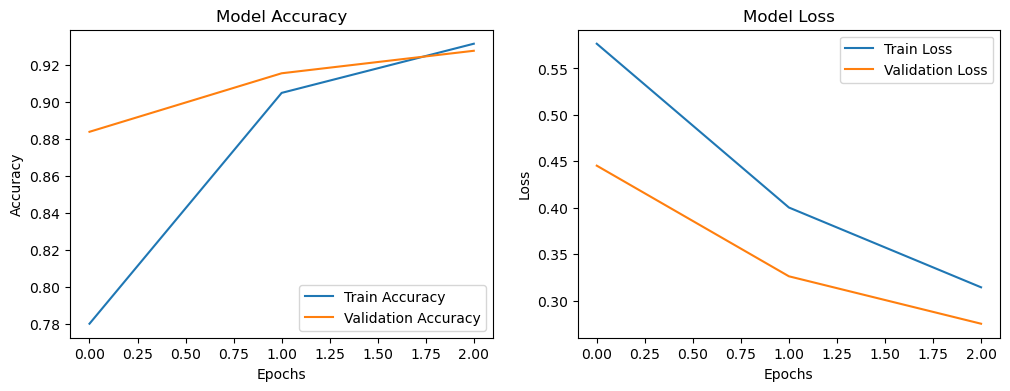

In [155]:
# Choose model type
model_type = 'rnn'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## LSTM

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5766 - loss: 0.7075 - val_accuracy: 0.7194 - val_loss: 0.6811
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.6732 - val_accuracy: 0.7251 - val_loss: 0.6260
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7132 - loss: 0.6293 - val_accuracy: 0.8005 - val_loss: 0.5588
Training Accuracy: 0.7857577800750732
Test Accuracy: 0.8004866242408752
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.83      0.76      0.79       611
        Real       0.78      0.84      0.81       622

    accuracy                           0.80      1233
   macro avg       0.80      0.80      0.80      1233
weighted avg       0.80      0.80      0.80      1233


Confusion Matrix:
[[463 148]
 [ 98 524]]


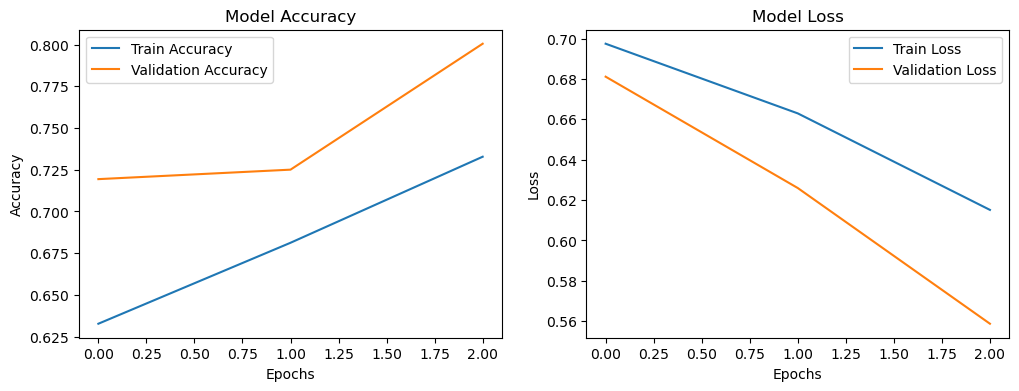

In [157]:
# Choose model type
model_type = 'lstm'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## GRU

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6339 - loss: 0.6945 - val_accuracy: 0.7770 - val_loss: 0.6101
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7710 - loss: 0.5898 - val_accuracy: 0.8873 - val_loss: 0.4525
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8927 - loss: 0.4317 - val_accuracy: 0.9213 - val_loss: 0.3301
Training Accuracy: 0.939135730266571
Test Accuracy: 0.9213300943374634
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.94      0.90      0.92       611
        Real       0.91      0.94      0.92       622

    accuracy                           0.92      1233
   macro avg       0.92      0.92      0.92      1233
weighted avg       0.92      0.92      0.92      1233


Confusion Matrix:
[[552  59]
 [ 38 584]]


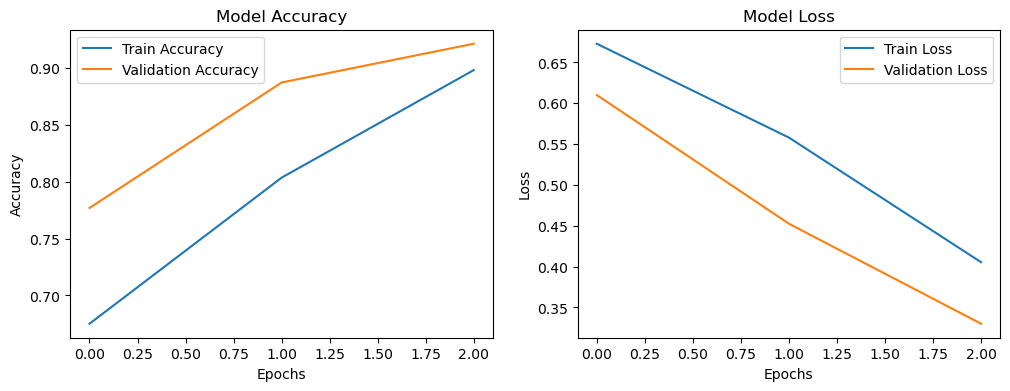

In [159]:
# Choose model type
model_type = 'gru'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## bidir_rnn

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7556 - loss: 0.6021 - val_accuracy: 0.9100 - val_loss: 0.3454
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.3144 - val_accuracy: 0.9286 - val_loss: 0.2641
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.2376 - val_accuracy: 0.9359 - val_loss: 0.2431
Training Accuracy: 0.9766687154769897
Test Accuracy: 0.9359286427497864
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94       611
        Real       0.94      0.94      0.94       622

    accuracy                           0.94      1233
   macro avg       0.94      0.94      0.94      1233
weighted avg       0.94      0.94      0.94      1233


Confusion Matrix:
[[572  39]
 [ 40 582]]


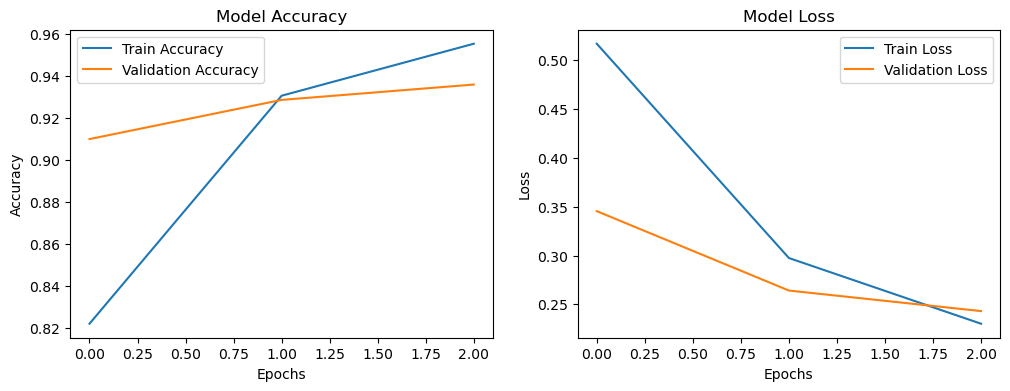

In [161]:
# Choose model type
model_type = 'bidir_rnn'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## bidir_lstm

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6109 - loss: 0.7282 - val_accuracy: 0.7088 - val_loss: 0.6711
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6891 - loss: 0.6621 - val_accuracy: 0.7591 - val_loss: 0.5986
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7559 - loss: 0.5884 - val_accuracy: 0.8719 - val_loss: 0.4573
Training Accuracy: 0.8874011039733887
Test Accuracy: 0.8718572854995728
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.85      0.90      0.87       611
        Real       0.89      0.85      0.87       622

    accuracy                           0.87      1233
   macro avg       0.87      0.87      0.87      1233
weighted avg       0.87      0.87      0.87      1233


Confusion Matrix:
[[549  62]
 [ 96 526]]


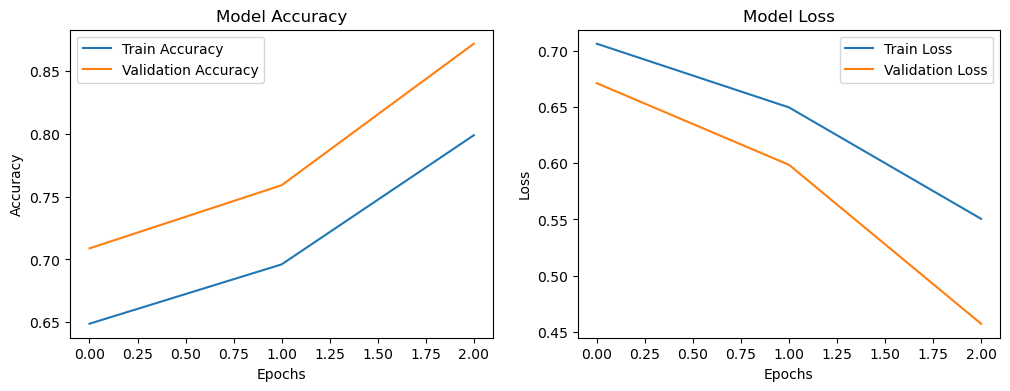

In [163]:
# Choose model type
model_type = 'bidir_lstm'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## bidir_gru

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6506 - loss: 0.7084 - val_accuracy: 0.8264 - val_loss: 0.5560
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.5048 - val_accuracy: 0.9084 - val_loss: 0.3564
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.3339 - val_accuracy: 0.9262 - val_loss: 0.2883
Training Accuracy: 0.9614526033401489
Test Accuracy: 0.926196277141571
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.92      0.93       611
        Real       0.92      0.93      0.93       622

    accuracy                           0.93      1233
   macro avg       0.93      0.93      0.93      1233
weighted avg       0.93      0.93      0.93      1233


Confusion Matrix:
[[563  48]
 [ 43 579]]


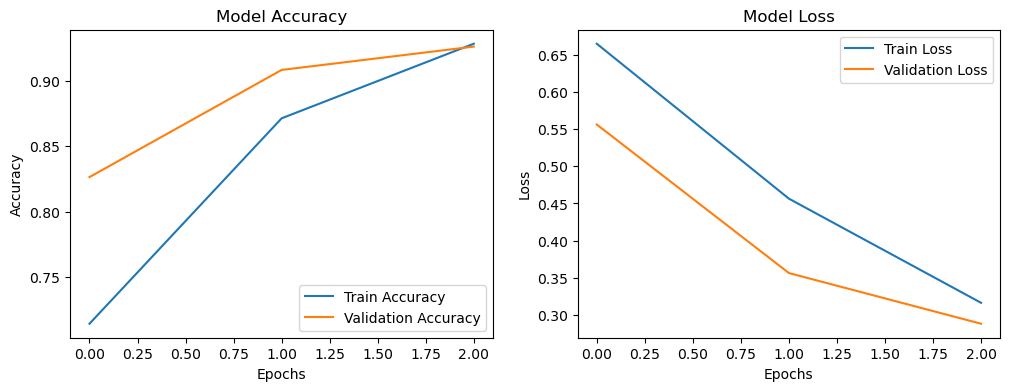

In [165]:
# Choose model type
model_type = 'bidir_gru'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# RNN, LSTM, GRU, BI-RNN, BI-LSTM, BI-GRU ---> Word2vec

In [173]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert sparse TF-IDF features to dense format for TensorFlow
X = combined_features_w2v
y = df['label'].values  # Convert labels to numpy array

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data for RNN-based models (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define model architecture

def build_rnn():
    model = Sequential([
        SimpleRNN(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2])),
        Dropout(0.3),
        SimpleRNN(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_lstm():
    model = Sequential([
        LSTM(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2])),
        Dropout(0.3),
        LSTM(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_gru():
    model = Sequential([
        GRU(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2])),
        Dropout(0.3),
        GRU(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bidir_rnn():
    model = Sequential([
        Bidirectional(SimpleRNN(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2]))),
        Dropout(0.3),
        Bidirectional(SimpleRNN(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bidir_lstm():
    model = Sequential([
        Bidirectional(LSTM(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2]))),
        Dropout(0.3),
        Bidirectional(LSTM(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bidir_gru():
    model = Sequential([
        Bidirectional(GRU(5, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(1, X_train.shape[2]))),
        Dropout(0.3),
        Bidirectional(GRU(5, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

## rnn

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5799 - loss: 0.6975 - val_accuracy: 0.7948 - val_loss: 0.4942
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.7949 - loss: 0.5016 - val_accuracy: 0.8605 - val_loss: 0.3719
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8609 - loss: 0.4027 - val_accuracy: 0.8824 - val_loss: 0.3214
Training Accuracy: 0.8784743547439575
Test Accuracy: 0.882400631904602
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.88      0.88      0.88       611
        Real       0.88      0.88      0.88       622

    accuracy                           0.88      1233
   macro avg       0.88      0.88      0.88      1233
weighted avg       0.88      0.88      0.88      1233


Confusion Matrix:
[[539  72]
 [ 73 549]]


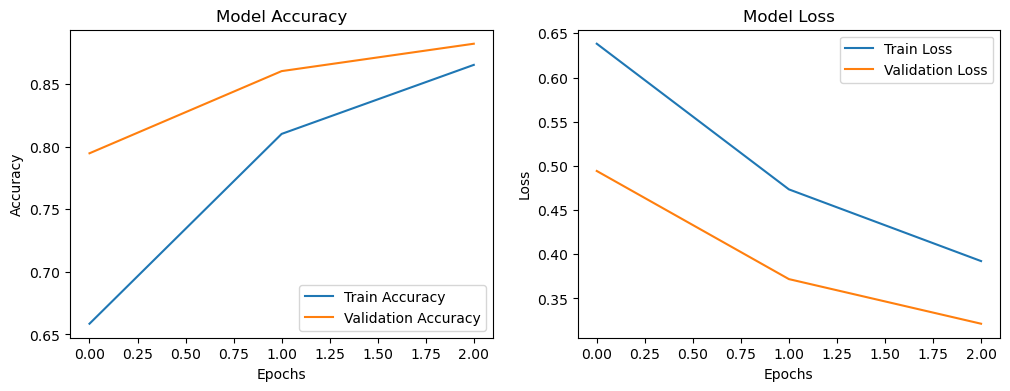

In [175]:
# Choose model type
model_type = 'rnn'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## lstm

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6263 - loss: 0.7127 - val_accuracy: 0.8289 - val_loss: 0.6029
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8146 - loss: 0.5700 - val_accuracy: 0.8613 - val_loss: 0.4340
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8722 - loss: 0.4394 - val_accuracy: 0.8808 - val_loss: 0.3552
Training Accuracy: 0.8876039981842041
Test Accuracy: 0.8807786107063293
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.89      0.87      0.88       611
        Real       0.88      0.89      0.88       622

    accuracy                           0.88      1233
   macro avg       0.88      0.88      0.88      1233
weighted avg       0.88      0.88      0.88      1233


Confusion Matrix:
[[532  79]
 [ 68 554]]


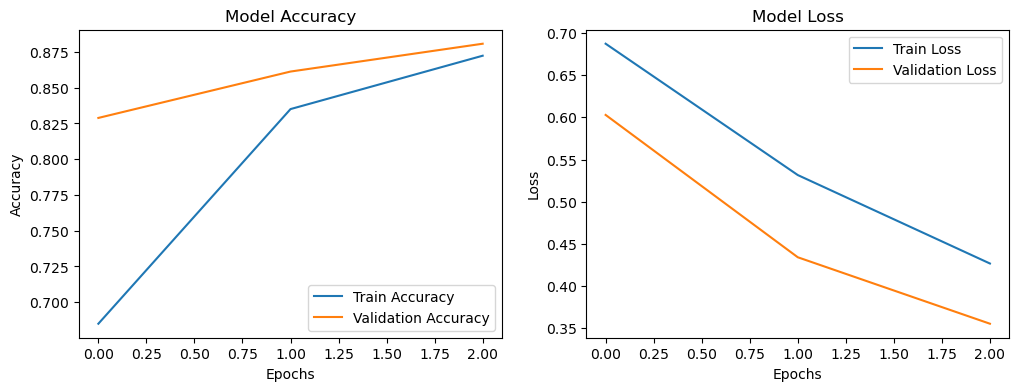

In [177]:
# Choose model type
model_type = 'lstm'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## gru

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6267 - loss: 0.6784 - val_accuracy: 0.8200 - val_loss: 0.4814
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8118 - loss: 0.4804 - val_accuracy: 0.8581 - val_loss: 0.3692
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8558 - loss: 0.3903 - val_accuracy: 0.8743 - val_loss: 0.3184
Training Accuracy: 0.8843578696250916
Test Accuracy: 0.8742903470993042
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.89      0.85      0.87       611
        Real       0.86      0.90      0.88       622

    accuracy                           0.87      1233
   macro avg       0.88      0.87      0.87      1233
weighted avg       0.88      0.87      0.87      1233


Confusion Matrix:
[[517  94]
 [ 61 561]]


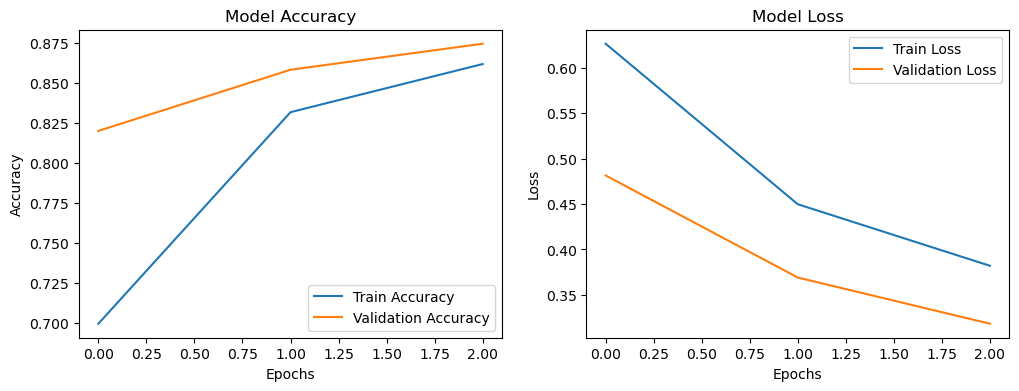

In [179]:
# Choose model type
model_type = 'gru'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## bidir_rnn

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6433 - loss: 0.6501 - val_accuracy: 0.8362 - val_loss: 0.4093
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8437 - loss: 0.4062 - val_accuracy: 0.8694 - val_loss: 0.3440
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8513 - loss: 0.3782 - val_accuracy: 0.8808 - val_loss: 0.3144
Training Accuracy: 0.8847636580467224
Test Accuracy: 0.8807786107063293
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.87      0.89      0.88       611
        Real       0.89      0.87      0.88       622

    accuracy                           0.88      1233
   macro avg       0.88      0.88      0.88      1233
weighted avg       0.88      0.88      0.88      1233


Confusion Matrix:
[[543  68]
 [ 79 543]]


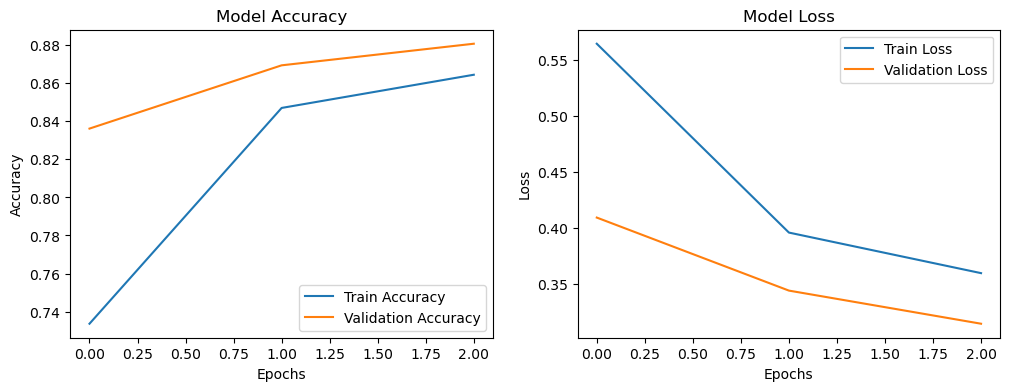

In [181]:
# Choose model type
model_type = 'bidir_rnn'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## bidir_lstm

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6594 - loss: 0.7265 - val_accuracy: 0.8378 - val_loss: 0.5063
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8550 - loss: 0.4745 - val_accuracy: 0.8897 - val_loss: 0.3562
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.8855 - loss: 0.3691 - val_accuracy: 0.8978 - val_loss: 0.3154
Training Accuracy: 0.8995739221572876
Test Accuracy: 0.8978102207183838
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.88      0.90       611
        Real       0.89      0.91      0.90       622

    accuracy                           0.90      1233
   macro avg       0.90      0.90      0.90      1233
weighted avg       0.90      0.90      0.90      1233


Confusion Matrix:
[[539  72]
 [ 54 568]]


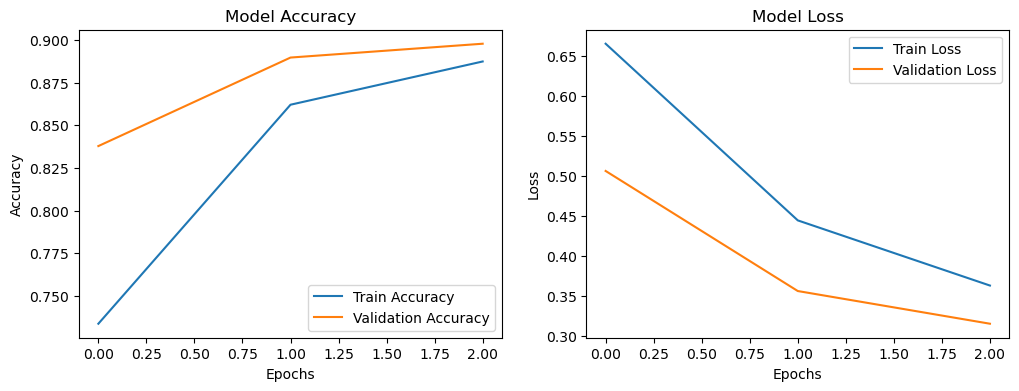

In [183]:
# Choose model type
model_type = 'bidir_lstm'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## bidir_gru

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6132 - loss: 0.7164 - val_accuracy: 0.8370 - val_loss: 0.4705
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.4470 - val_accuracy: 0.8856 - val_loss: 0.3431
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8842 - loss: 0.3549 - val_accuracy: 0.8881 - val_loss: 0.3064
Training Accuracy: 0.8985595703125
Test Accuracy: 0.8880778551101685
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.90      0.87      0.89       611
        Real       0.88      0.91      0.89       622

    accuracy                           0.89      1233
   macro avg       0.89      0.89      0.89      1233
weighted avg       0.89      0.89      0.89      1233


Confusion Matrix:
[[532  79]
 [ 59 563]]


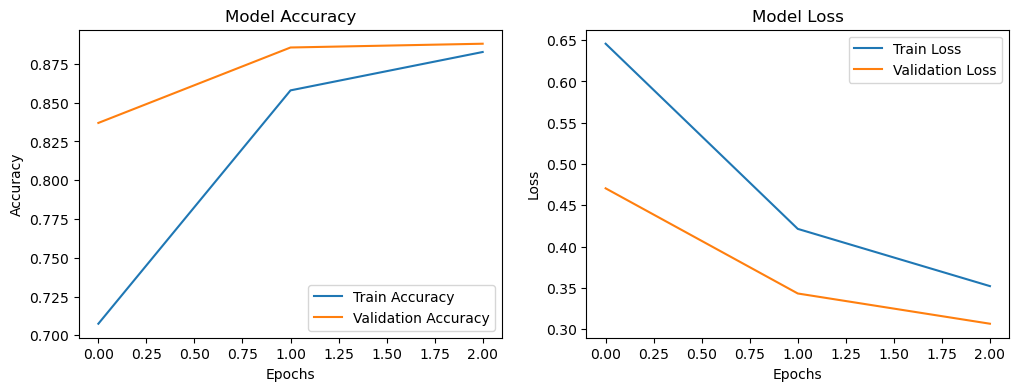

In [185]:
# Choose model type
model_type = 'bidir_gru'  # Change to 'rnn' or 'gru' to test other models

if model_type == 'rnn':
    model = build_rnn()
elif model_type == 'lstm':
    model = build_lstm()
elif model_type == 'gru':
    model = build_gru()
elif model_type == 'bidir_rnn':
    model = build_bidir_rnn()
elif model_type == 'bidir_lstm':
    model = build_bidir_lstm()
elif model_type == 'bidir_gru':
    model = build_bidir_gru()

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# TFIDF - Transformer

Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_66      │ (None, 1, 5013)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 5013)   │  1,288,533 │ input_layer_66[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_66[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_46 (Add)        │ (None, 1, 5013)   │          0 │ input_layer_66[0… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5013)   │     10,026 │ add_46[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_134 (Dense)   │ (None, 1, 64)     │    320,896 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_126         │ (None, 1, 64)     │          0 │ dense_134[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_135 (Dense)   │ (None, 1, 5013)   │    325,845 │ dropout_126[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_47 (Add)        │ (None, 1, 5013)   │          0 │ layer_normalizat… │
│                     │                   │            │ dense_135[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 5013)   │     10,026 │ add_47[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 5013)      │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_136 (Dense)   │ (None, 32)        │    160,448 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_127         │ (None, 32)        │          0 │ dense_136[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_137 (Dense)   │ (None, 1)         │         33 │ dropout_127[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,115,807 (8.07 MB)

 Trainable params: 2,115,807 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6031 - loss: 1.1048 - val_accuracy: 0.9067 - val_loss: 0.5562
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7283 - loss: 0.7554 - val_accuracy: 0.9002 - val_loss: 0.4608
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7707 - loss: 0.6579 - val_accuracy: 0.8994 - val_loss: 0.4278
Training Accuracy: 0.9269628524780273
Test Accuracy: 0.8994323015213013
30/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.86      0.95      0.90       611
        Real       0.95      0.85      0.89       622

    accuracy                           0.90      1233
   macro avg       0.90      0.90      0.90      1233
weighted avg       0.90      0.90      0.90      1233


Confusion Matrix:
[[582  29]
 [ 95 527]]


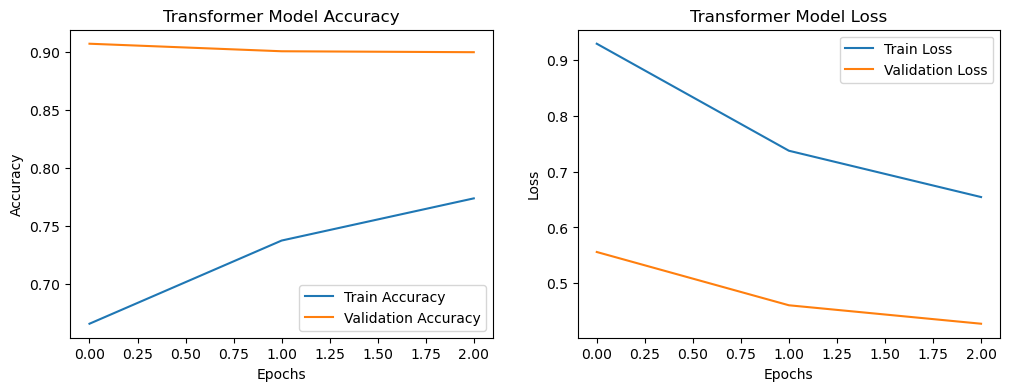

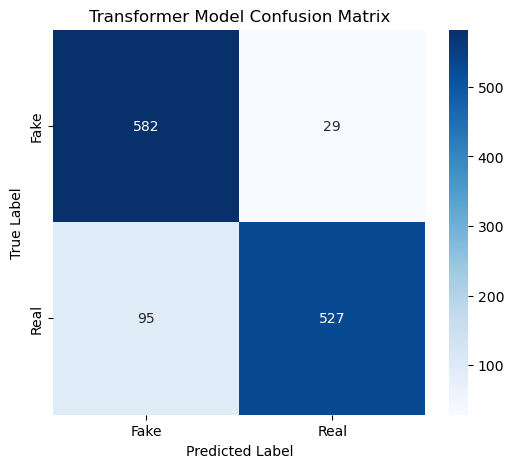

In [273]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Use tfidf features directly
X = combined_features_tfidf.toarray()
y = df['label'].values  # Convert labels to numpy array

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data for transformer model (samples, sequence_length, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define transformer model
def build_transformer(input_shape, head_size=64, num_heads=2, ff_dim=128, num_transformer_blocks=2, 
                     mlp_units=[64], dropout=0.3, mlp_dropout=0.3):
    """
    Build a transformer model for binary classification
    """
    inputs = Input(shape=input_shape)
    x = inputs
    
    # Create transformer blocks
    for _ in range(num_transformer_blocks):
        # Self-attention block
        attention_output = MultiHeadAttention(
            key_dim=head_size, num_heads=num_heads, dropout=dropout
        )(x, x)
        x = LayerNormalization(epsilon=1e-6)(x + attention_output)  # Add & Norm
        
        # Feed Forward block
        ffn = Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.001))(x)
        ffn = Dropout(dropout)(ffn)
        ffn = Dense(input_shape[-1], kernel_regularizer=l2(0.001))(ffn)
        x = LayerNormalization(epsilon=1e-6)(x + ffn)  # Add & Norm
    
    # Global pooling for classification
    x = GlobalAveragePooling1D()(x)
    
    # Final classification head
    for dim in mlp_units:
        x = Dense(dim, activation="relu", kernel_regularizer=l2(0.001))(x)
        x = Dropout(mlp_dropout)(x)
    
    outputs = Dense(1, activation="sigmoid")(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build and compile transformer model
model = build_transformer(
    input_shape=(1, X_train.shape[2]),  # Input shape based on your data
    head_size=32,                       # Size of each attention head
    num_heads=2,                        # Number of attention heads
    ff_dim=64,                          # Feed-forward network dimension
    num_transformer_blocks=1,           # Number of transformer blocks
    mlp_units=[32],                     # Final MLP layer units
    dropout=0.7,                        # Dropout rate in transformer blocks
    mlp_dropout=0.7                    # Dropout rate in final MLP
)
# Compile model
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0007),
    metrics=["accuracy"]
)

# Print model summary
model.summary()

# Train model
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Transformer Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Transformer Model Loss')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Transformer Model Confusion Matrix')
plt.show()

In [277]:
model.save('/Users/venkatatarunkumarmavillapalli/Desktop/models/tfidf_transformer_model.keras')


# Word2vec - Transformer

Model: "functional_72"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_67      │ (None, 1, 113)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 113)    │     29,233 │ input_layer_67[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_67[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 1, 113)    │          0 │ input_layer_67[0… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 113)    │        226 │ add_48[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_138 (Dense)   │ (None, 1, 64)     │      7,296 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_130         │ (None, 1, 64)     │          0 │ dense_138[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_139 (Dense)   │ (None, 1, 113)    │      7,345 │ dropout_130[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_49 (Add)        │ (None, 1, 113)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_139[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 113)    │        226 │ add_49[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 113)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_140 (Dense)   │ (None, 32)        │      3,648 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_131         │ (None, 32)        │          0 │ dense_140[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_141 (Dense)   │ (None, 1)         │         33 │ dropout_131[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,007 (187.53 KB)

 Trainable params: 48,007 (187.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5832 - loss: 0.9928 - val_accuracy: 0.8556 - val_loss: 0.5499
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.6850 - val_accuracy: 0.8800 - val_loss: 0.4764
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.5769 - val_accuracy: 0.8946 - val_loss: 0.4332
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.5443 - val_accuracy: 0.9027 - val_loss: 0.4007
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.5080 - val_accuracy: 0.9067 - val_loss: 0.3855
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.4835 - val_accuracy: 0.9027 - val_loss: 0.3813
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.4649 - val_accuracy: 0.9027 - val_loss: 0.3743
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.4675 - val_accuracy: 0.9084 - val_

/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


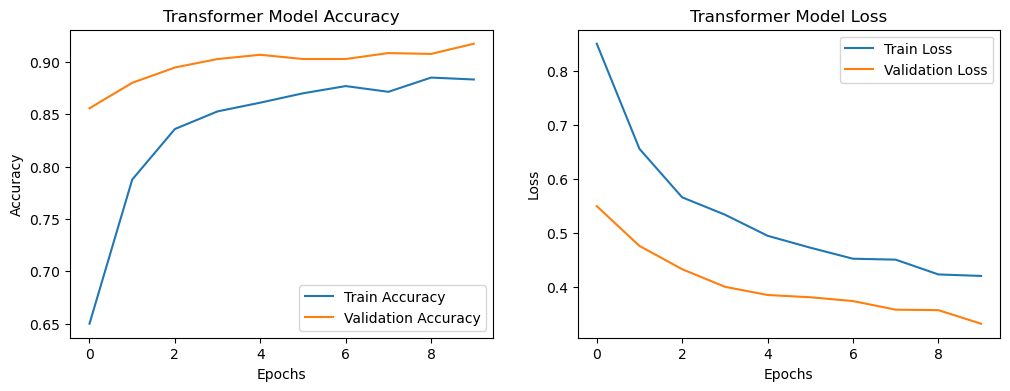

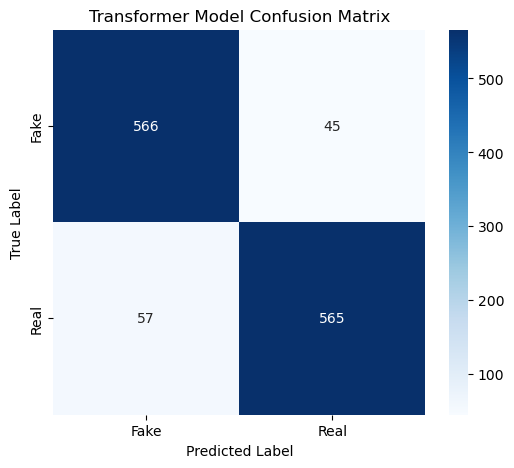

In [281]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Use Word2Vec features directly
X = combined_features_w2v
y = df['label'].values  # Convert labels to numpy array

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data for transformer model (samples, sequence_length, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define transformer model
def build_transformer(input_shape, head_size=64, num_heads=2, ff_dim=128, num_transformer_blocks=2, 
                     mlp_units=[64], dropout=0.3, mlp_dropout=0.3):
    """
    Build a transformer model for binary classification
    """
    inputs = Input(shape=input_shape)
    x = inputs
    
    # Create transformer blocks
    for _ in range(num_transformer_blocks):
        # Self-attention block
        attention_output = MultiHeadAttention(
            key_dim=head_size, num_heads=num_heads, dropout=dropout
        )(x, x)
        x = LayerNormalization(epsilon=1e-6)(x + attention_output)  # Add & Norm
        
        # Feed Forward block
        ffn = Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.001))(x)
        ffn = Dropout(dropout)(ffn)
        ffn = Dense(input_shape[-1], kernel_regularizer=l2(0.001))(ffn)
        x = LayerNormalization(epsilon=1e-6)(x + ffn)  # Add & Norm
    
    # Global pooling for classification
    x = GlobalAveragePooling1D()(x)
    
    # Final classification head
    for dim in mlp_units:
        x = Dense(dim, activation="relu", kernel_regularizer=l2(0.001))(x)
        x = Dropout(mlp_dropout)(x)
    
    outputs = Dense(1, activation="sigmoid")(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build and compile transformer model
model = build_transformer(
    input_shape=(1, X_train.shape[2]),  # Input shape based on your data
    head_size=32,                       # Size of each attention head
    num_heads=2,                        # Number of attention heads
    ff_dim=64,                          # Feed-forward network dimension
    num_transformer_blocks=1,           # Number of transformer blocks
    mlp_units=[32],                     # Final MLP layer units
    dropout=0.7,                        # Dropout rate in transformer blocks
    mlp_dropout=0.7                    # Dropout rate in final MLP
)
# Compile model
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0007),
    metrics=["accuracy"]
)
# Print model summary
model.summary()

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Transformer Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Transformer Model Loss')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Transformer Model Confusion Matrix')
plt.show()

In [283]:
model.save('/Users/venkatatarunkumarmavillapalli/Desktop/models/word2vec_transformer_model.keras')

# BERT

### **Architecture of the BertForSequenceClassification model:**

**Input**

- Input sequence of tokens (e.g. words or characters)

**Embeddings**

- Token embeddings (30522, 768) -> output shape: (batch_size, sequence_length, 768)
- Position embeddings (512, 768) -> output shape: (batch_size, sequence_length, 768)
- Token type embeddings (2, 768) -> output shape: (batch_size, sequence_length, 768)
- Layer normalization -> output shape: (batch_size, sequence_length, 768)
- Dropout (p=0.1) -> output shape: (batch_size, sequence_length, 768)

**Encoder**

**12 identical layers of:**

> Self-attention mechanism:
- Query linear layer (768, 768) -> output shape: (batch_size, sequence_length, 768)
- Key linear layer (768, 768) -> output shape: (batch_size, sequence_length, 768)
- Value linear layer (768, 768) -> output shape: (batch_size, sequence_length, 768)
- Dropout (p=0.1) -> output shape: (batch_size, sequence_length, 768)

> Intermediate feed-forward neural network:
- Linear layer (768, 3072) -> output shape: (batch_size, sequence_length, 3072)
- GELU activation function -> output shape: (batch_size, sequence_length, 3072)

>Output feed-forward neural network:
- Linear layer (3072, 768) -> output shape: (batch_size, sequence_length, 768)
- Layer normalization -> output shape: (batch_size, sequence_length, 768)
- Dropout (p=0.1) -> output shape: (batch_size, sequence_length, 768)

**Pooler**

- Linear layer (768, 768) -> output shape: (batch_size, 768)
- Tanh activation function -> output shape: (batch_size, 768)

**Classifier**

- Dropout (p=0.1) -> output shape: (batch_size, 768)
- Linear layer (768, 2) -> output shape: (batch_size, 2)

**Output**

- Probability distribution over the 2 classes
Note that the output shape of each layer is shown in the format (batch_size, sequence_length, hidden_size), where batch_size is the batch size, sequence_length is the length of the input sequence, and hidden_size is the number of hidden units in the layer.

### **How does BertModel work**

- Embeddings: This module is responsible for converting input tokens into embeddings. It consists of:
- word_embeddings: A learned embedding layer that maps each token to a 768-dimensional vector.
- position_embeddings: A learned embedding layer that maps each token's position to a 768-dimensional vector.
- token_type_embeddings: A learned embedding layer that maps each token's type (e.g., sentence A or sentence B) to a 768-dimensional vector.
- LayerNorm: A layer normalization layer to normalize the embeddings.
- dropout: A dropout layer to randomly drop out some embeddings during training.

> Encoder: This module is the core of the BERT model, responsible for encoding the input sequence. It consists of:
- layer: A list of 12 identical BertLayer modules, each of which applies self-attention, feed-forward neural networks, and layer normalization to the input sequence.

> BertLayer:
- attention: A self-attention mechanism that computes attention weights and applies them to the input sequence.
- intermediate: A feed-forward neural network that transforms the output of the self-attention mechanism.
- output: Another feed-forward neural network that transforms the output of the intermediate layer.

>Pooler: This module is responsible for generating a fixed-size representation of the input sequence. It consists of:
- dense: A linear layer that transforms the output of the encoder into a 768-dimensional vector.
- activation: A tanh activation function to normalize the output.

> BertForSequenceClassification

- dropout: A dropout layer to randomly drop out some of the output features during training.
- classifier: A linear layer that takes the output of the pooler and outputs a probability distribution over the possible classes (in this case, 2 classes).
In summary, this model uses the BERT architecture to encode the input sequence, and then applies a classification head on top of the pooled output to predict the class label.

### **Why Bert?**

"BERT" stands for "Bidirectional Encoder Representations from Transformers." "bert-base-uncased" refers to one of the pre-trained versions of BERT with a specific configuration. Here are three key points about "bert-base-uncased":

1. **Architecture and Pre-training:**
   - BERT is a transformer-based model architecture developed by Google. It utilizes attention mechanisms to process input data in a bidirectional manner, considering context from both left and right sides of a given token.
   - "bert-base-uncased" refers to an uncased version of BERT, meaning that the model was trained on lowercased text. This version has 12 transformer layers, 768 hidden dimensions, and 12 attention heads.
   - The model is pre-trained on large corpora, such as Wikipedia and BookCorpus, to learn contextualized representations of words and phrases, enabling it to capture rich semantic relationships.

2. **Tokenization and Vocabulary:**
   - BERT tokenizes input text into subword pieces using WordPiece tokenization. This allows the model to handle out-of-vocabulary words by breaking them into smaller, known subword units.
   - The vocabulary of "bert-base-uncased" consists of approximately 30,000 subword pieces. This extensive vocabulary helps the model understand a wide range of linguistic nuances and variations.

3. **Transfer Learning and Fine-tuning:**
   - One of the strengths of BERT is its effectiveness in transfer learning. After pre-training on a large corpus, the model can be fine-tuned on specific downstream tasks, such as text classification, named entity recognition, or question-answering.
   - Fine-tuning involves updating the weights of the pre-trained BERT model on a smaller dataset related to the target task. This allows the model to adapt its knowledge to specific domains or applications, often achieving state-of-the-art performance in various natural language processing (NLP) tasks.

Overall, "bert-base-uncased" is a versatile and widely-used pre-trained language model that has demonstrated impressive results across a range of NLP applications.

**Reference:** https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
import matplotlib.pyplot as plt

/Users/venkatatarunkumarmavillapalli/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
data = pd.read_csv('/Users/venkatatarunkumarmavillapalli/Desktop/DM_final/cleaned_news.csv') 

In [3]:
df=data

In [4]:
df.head()

,label,word_count_text,word_count_title,alphabetic_count_text,alphabetic_count_title,sentiment,article
0,FAKE,693,3,4312,17,Negative,smell hillarys fear daniel greenfield shillman...
1,FAKE,241,11,1517,64,Positive,watch exact moment paul ryan committed politic...
2,REAL,247,5,1524,27,Positive,kerry go paris gesture sympathy us secretary s...
3,FAKE,260,8,1666,45,Negative,bernie supporters twitter erupt anger dnc trie...
4,REAL,185,5,1064,27,Positive,battle new york primary matters primary day ne...


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
import matplotlib.pyplot as plt

# Split the dataset into training, validation, and testing sets
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

X_train = train_data['article'].values
y_train = train_data['label'].values
X_val = val_data['article'].values
y_val = val_data['label'].values
X_test = test_data['article'].values
y_test = test_data['label'].values

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the training and testing data
X_train_encoded = tokenizer(X_train.tolist(), truncation=True, padding=True, return_tensors='pt')
X_val_encoded = tokenizer(X_val.tolist(), truncation=True, padding=True, return_tensors='pt')
X_test_encoded = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors='pt')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = torch.tensor(label_encoder.fit_transform(y_train), dtype=torch.long)
y_val_encoded = torch.tensor(label_encoder.transform(y_val), dtype=torch.long)
y_test_encoded = torch.tensor(label_encoder.transform(y_test), dtype=torch.long)

In [6]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define datasets and data loaders
train_dataset = TensorDataset(X_train_encoded['input_ids'], X_train_encoded['attention_mask'], y_train_encoded)
val_dataset = TensorDataset(X_val_encoded['input_ids'], X_val_encoded['attention_mask'], y_val_encoded)
test_dataset = TensorDataset(X_test_encoded['input_ids'], X_test_encoded['attention_mask'], y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Training loop with early stopping
epochs = 3
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Initialize early stopping parameters
best_val_accuracy = 0.0
patience = 3
no_improvement_counter = 0


for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    # Evaluation on validation set

    model.eval()
    all_predictions = []
    all_labels = []
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            predictions = torch.argmax(outputs.logits, dim=1)

            val_loss += torch.nn.CrossEntropyLoss()(outputs.logits, labels).item()

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    accuracy = accuracy_score(all_labels, all_predictions)
    val_accuracies.append(accuracy)

    # Evaluation on training set
    model.eval()
    all_predictions_train = []
    all_labels_train = []
    with torch.no_grad():
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            predictions = torch.argmax(outputs.logits, dim=1)

            all_predictions_train.extend(predictions.cpu().numpy())
            all_labels_train.extend(labels.cpu().numpy())

    train_accuracy = accuracy_score(all_labels_train, all_predictions_train)
    train_accuracies.append(train_accuracy)

    # Performance on Test set
    model.eval()
    all_predictions_test = []
    all_labels_test = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            predictions = torch.argmax(outputs.logits, dim=1)

            all_predictions_test.extend(predictions.cpu().numpy())
            all_labels_test.extend(labels.cpu().numpy())

    test_accuracy = accuracy_score(all_labels_test, all_predictions_test)
    test_precision = precision_score(all_labels_test, all_predictions_test, average='weighted')
    test_recall = recall_score(all_labels_test, all_predictions_test, average='weighted')
    test_f1 = f1_score(all_labels_test, all_predictions_test, average='weighted')



    print(f'Epoch {epoch + 1}/{epochs} -> '
          f'Training Accuracy: {train_accuracy * 100:.2f}% '
          f'Test Accuracy: {test_accuracy * 100:.2f}% '
          f'Validation Accuracy: {accuracy * 100:.2f}% '
          f'Precision: {test_precision:.4f} '
          f'Recall: {test_recall:.4f} '
          f'F1 Score: {test_f1:.4f} '
          f'Training Loss: {np.mean(train_losses):.4f} '
          f'Test Loss: {np.mean(val_losses):.4f} '
          f'Validation Loss: {val_loss:.4f}')


Epoch 1/3 -> Training Accuracy: 94.48% Test Accuracy: 92.34% Validation Accuracy: 92.34% Precision: 0.9234 Recall: 0.9234 F1 Score: 0.9234 Training Loss: 0.3973 Test Loss: 0.2138 Validation Loss: 0.2138
Epoch 2/3 -> Training Accuracy: 97.97% Test Accuracy: 93.94% Validation Accuracy: 93.30% Precision: 0.9397 Recall: 0.9394 F1 Score: 0.9394 Training Loss: 0.2851 Test Loss: 0.1906 Validation Loss: 0.1675
Epoch 3/3 -> Training Accuracy: 99.20% Test Accuracy: 95.69% Validation Accuracy: 95.22% Precision: 0.9582 Recall: 0.9569 F1 Score: 0.9569 Training Loss: 0.2192 Test Loss: 0.1744 Validation Loss: 0.1420


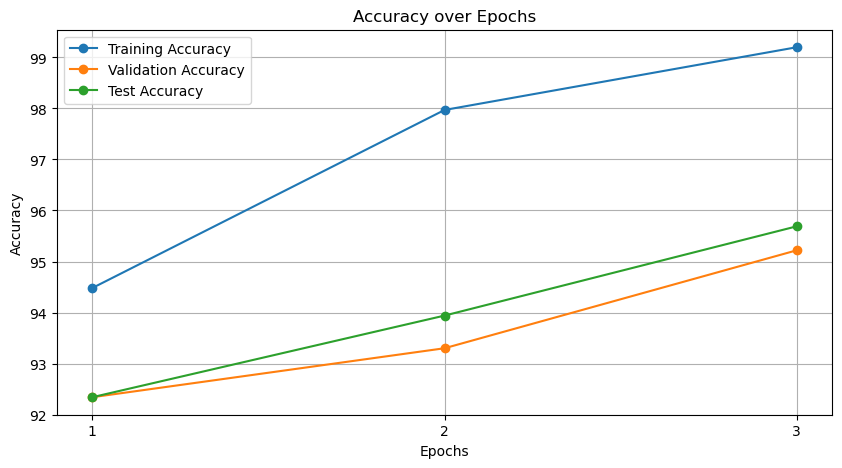

In [19]:
import matplotlib.pyplot as plt

# Extracted data from the provided output
epochs = [1, 2, 3]  # Number of epochs
train_accuracy = [94.48, 97.97, 99.20]  # Training accuracy at each epoch
val_accuracy = [92.34, 93.30, 95.22]  # Validation accuracy at each epoch
test_accuracy = [92.34, 93.94, 95.69]  # Test accuracy at each epoch
train_loss = [0.3973, 0.2851, 0.2192]  # Training loss at each epoch
val_loss = [0.2138, 0.1675, 0.1420]  # Validation loss at each epoch
test_loss = [0.2138, 0.1906, 0.1744]  # Test loss at each epoch
precision = [0.9234, 0.9397, 0.9582]  # Precision at each epoch
recall = [0.9234, 0.9394, 0.9569]  # Recall at each epoch
f1_score = [0.9234, 0.9394, 0.9569]  # F1 score at each epoch

# Plot Training, Validation, and Test Accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

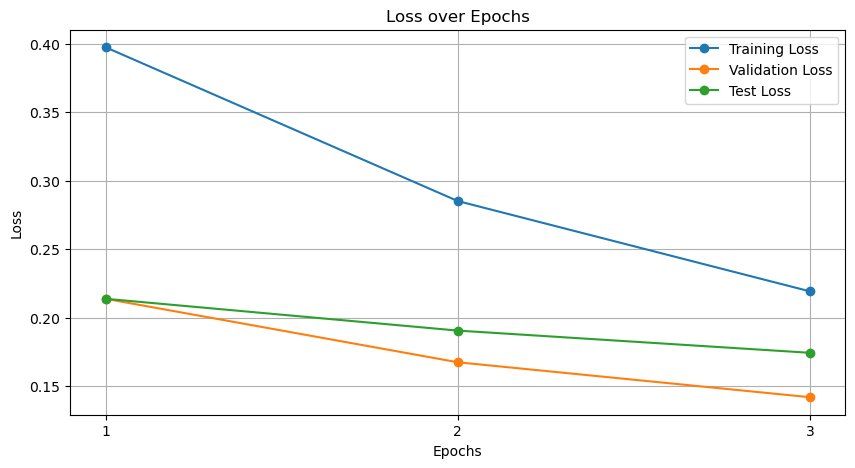

In [26]:
# Extracted data from the provided output
epochs = [1, 2, 3]  # Number of epochs
train_accuracy = [94.48, 97.97, 99.20]  # Training accuracy at each epoch
val_accuracy = [92.34, 93.30, 95.22]  # Validation accuracy at each epoch
test_accuracy = [92.34, 93.94, 95.69]  # Test accuracy at each epoch
train_loss = [0.3973, 0.2851, 0.2192]  # Training loss at each epoch
val_loss = [0.2138, 0.1675, 0.1420]  # Validation loss at each epoch
test_loss = [0.2138, 0.1906, 0.1744]  # Test loss at each epoch
precision = [0.9234, 0.9397, 0.9582]  # Precision at each epoch
recall = [0.9234, 0.9394, 0.9569]  # Recall at each epoch
f1_score = [0.9234, 0.9394, 0.9569]  # F1 score at each epoch

# Plot Training, Validation, and Test Loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.plot(epochs, test_loss, label='Test Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

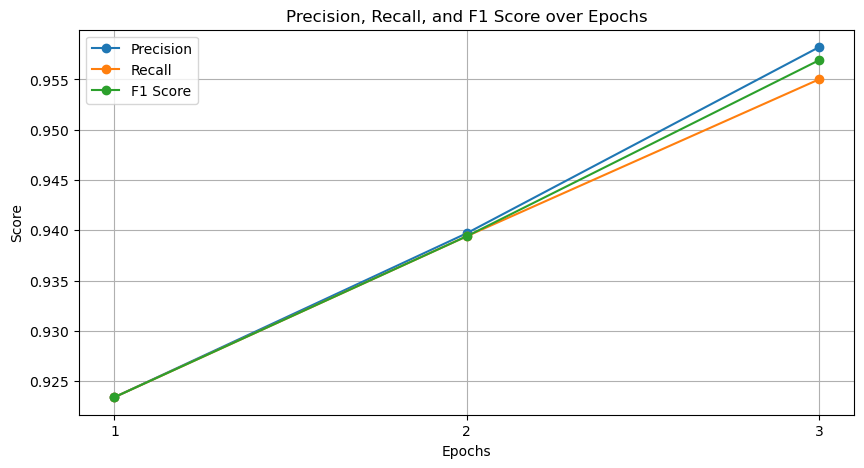

In [28]:
# Extracted data from the provided output
epochs = [1, 2, 3]  # Number of epochs
train_accuracy = [94.48, 97.97, 99.20]  # Training accuracy at each epoch
val_accuracy = [92.34, 93.30, 95.22]  # Validation accuracy at each epoch
test_accuracy = [92.34, 93.94, 95.69]  # Test accuracy at each epoch
train_loss = [0.3973, 0.2851, 0.2192]  # Training loss at each epoch
val_loss = [0.2138, 0.1675, 0.1420]  # Validation loss at each epoch
test_loss = [0.2138, 0.1906, 0.1744]  # Test loss at each epoch
precision = [0.9234, 0.9397, 0.9582]  # Precision at each epoch
recall = [0.9234, 0.9394, 0.9550]  # Recall at each epoch
f1_score = [0.9234, 0.9394, 0.9569]  # F1 score at each epoch


# Plot Precision, Recall, and F1 Score over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, precision, label='Precision', marker='o')
plt.plot(epochs, recall, label='Recall', marker='o')
plt.plot(epochs, f1_score, label='F1 Score', marker='o')
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

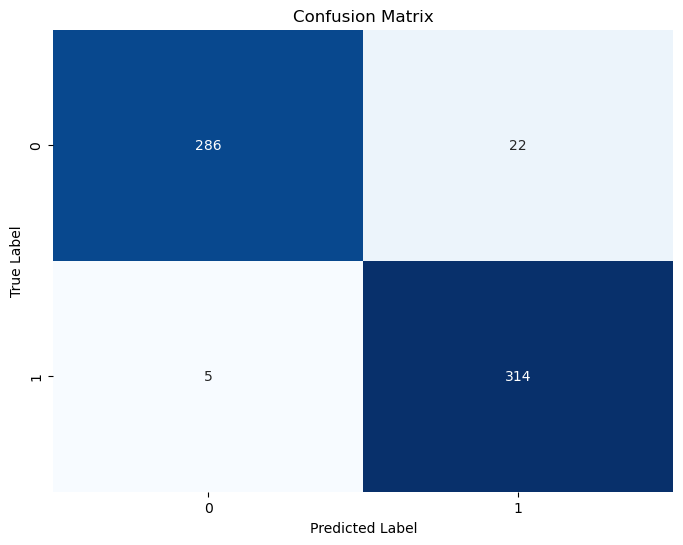

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels_test, all_predictions_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [18]:
print(conf_matrix)

[[286  22]
 [  5 314]]


**Breakdown:**

- True Positives (TP): 314 - The number of true positive predictions, where the model correctly predicted the positive class.

- True Negatives (TN): 286 - The number of true negative predictions, where the model correctly predicted the negative class.

- False Positives (FP): 22 - The number of false positive predictions, where the model incorrectly predicted the positive class.

- False Negatives (FN): 5 - The number of false negative predictions, where the model incorrectly predicted the negative class.

From this confusion matrix, we can calculate various **performance metrics**, such as:

- Accuracy: (TP + TN) / (TP + TN + FP + FN) = (314 + 286) / (314 + 286 + 22 + 5) = 0.953

- Precision: TP / (TP + FP) = 314 / (314 + 22) = 0.935

- Recall: TP / (TP + FN) = 314 / (314 + 5) = 0.984

- F1-score: 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.935 * 0.984) / (0.935 + 0.984) = 0.959

These metrics provide insights into the model's performance, such as its ability to correctly classify instances, avoid false positives, and detect true positives.

In [42]:
# Save model and tokenizer
model.save_pretrained('/Users/venkatatarunkumarmavillapalli/Desktop/model/pretrainedbert')
tokenizer.save_pretrained('/Users/venkatatarunkumarmavillapalli/Desktop/model/pretrainedtokenizer')

# To load the saved model and tokenizer later use:
# loaded_model = BertForSequenceClassification.from_pretrained('saved_model')
# loaded_tokenizer = BertTokenizer.from_pretrained('saved_model')


('/Users/venkatatarunkumarmavillapalli/Desktop/newmodel/tarun_saved_tokenizer/tokenizer_config.json',
 '/Users/venkatatarunkumarmavillapalli/Desktop/newmodel/tarun_saved_tokenizer/special_tokens_map.json',
 '/Users/venkatatarunkumarmavillapalli/Desktop/newmodel/tarun_saved_tokenizer/vocab.txt',
 '/Users/venkatatarunkumarmavillapalli/Desktop/newmodel/tarun_saved_tokenizer/added_tokens.json')

## Testing our model on articles.

#### MLP predictions

In [53]:
# Save the model and vectorizer
joblib.dump((mlp_model_tuned, vectorizer), 'tuned_mlp_model_with_vectorizer.joblib')


['tuned_mlp_model_with_vectorizer.joblib']

In [151]:
####Tesiting MLP ON expalmles
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the pre-trained MLP model
mlp_model_tuned = joblib.load('/Users/venkatatarunkumarmavillapalli/Desktop/DM_final/tuned_mlp_model.joblib')


# Function to preprocess the news article
def preprocess_news(news):
    news_vectorized = vectorizer.transform([news])
    return news_vectorized

# Function to predict the authenticity of the news
def predict_news(news):
    preprocessed_news = preprocess_news(news)
    prediction_proba = mlp_model_tuned.predict_proba(preprocessed_news)[:, 1][0]
    prediction = 'Real' if prediction_proba > 0.5 else 'Fake'
    confidence = prediction_proba if prediction_proba > 0.5 else 1 - prediction_proba
    return prediction, confidence




/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
# Example usage: Fake
news_article = "hillary clinton huge trouble america noticed sick thing hidden picture liberty writers news 0 hillary clinton barely lost presidential election already getting caught another one tangled web lies day losing picture posted taking dog walk picture reportedly random hiker ran showed getting back public life thats wants believe want favor take close look picture specifically hiker met memorize face got okay good show something hillary clinton hoping nobody else would notice tell girl 2nd picture taken 2000s reminds anyone yeah exact girl name margot gerster mother happens one big fundraisers hillary thats actually older picture taken wow doesnt seem random looks li"
prediction, confidence = predict_news(news_article)
print(f'Prediction: {prediction}, Confidence: {confidence:.2f}')

Prediction: Fake, Confidence: 1.00


In [10]:
# Example usage: Real
news_article = "kerry go paris gesture sympathy us secretary state john f kerry said monday stop paris later week amid criticism top american officials attended sundays unity march terrorism kerry said expects arrive paris thursday evening heads "
prediction, confidence = predict_news(news_article)
print(f'Prediction: {prediction}, Confidence: {confidence:.2f}')

Prediction: Real, Confidence: 1.00


In [11]:
# Example Unclead: Real
news_article = "What's in that Iran bill that Obama doesn't like?"
prediction, confidence = predict_news(news_article)
print(f'Prediction: {prediction}, Confidence: {confidence:.2f}')

Prediction: Fake, Confidence: 0.99


In [14]:
# Example Unclead:Real
news_article = "The bill would give Congress a chance to hold hearings, host briefings and pave the way to a vote on a joint resolution that could express approval or disapproval of the deal. It also requires the Obama administration to quickly report to Congress on details of the deal and regularly assess whether Iran is keeping its commitments. And it spells out what the President needs to do vis-a-vis Congress if Iran is found violating the terms."
prediction, confidence = predict_news(news_article)
print(f'Prediction: {prediction}, Confidence: {confidence:.2f}')

Prediction: Fake, Confidence: 1.00


#### BERT Predictions

In [74]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the model and tokenizer
loaded_model = BertForSequenceClassification.from_pretrained('/Users/priyamadhurigattem/Desktop/model/pretrainedbert')

In [75]:
loaded_tokenizer = BertTokenizer.from_pretrained('/Users/priyamadhurigattem/Desktop/model/pretrainedtokenizer')

In [76]:
# Ensure the model is in evaluation mode
loaded_model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [78]:
#example unclaned: real

from transformers import BertTokenizer
import torch

# Example text for prediction
text_to_predict = "What's in that Iran bill that Obama doesn't like?"

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the input text
tokenized_input = tokenizer.encode_plus(
    text_to_predict,
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Move input tensors to the device (GPU or CPU)
input_ids = tokenized_input['input_ids']
attention_mask = tokenized_input['attention_mask']

# Ensure the model is in evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    outputs = loaded_model(input_ids, attention_mask=attention_mask)

# Get the predicted class probabilities
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=1)

# Get the predicted class
predicted_class = torch.argmax(probabilities, dim=1).item()

# Decode the predicted class using label encoder
predicted_label = label_encoder.classes_[predicted_class]

print(f"Predicted Label: {predicted_label}")
print(f"\nClass Probabilities: {probabilities.squeeze().tolist()}")


Predicted Label: REAL

Class Probabilities: [0.3873184323310852, 0.6126815676689148]


In [79]:
#example unclaned: Fake

from transformers import BertTokenizer
import torch

# Example text for prediction
text_to_predict = "Now, I want you to do me a favor and take a very close look at this picture, specifically the “hiker” she met. Memorize her far... Got it? Okay, good."

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the input text
tokenized_input = tokenizer.encode_plus(
    text_to_predict,
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Move input tensors to the device (GPU or CPU)
input_ids = tokenized_input['input_ids']
attention_mask = tokenized_input['attention_mask']

# Ensure the model is in evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    outputs = loaded_model(input_ids, attention_mask=attention_mask)

# Get the predicted class probabilities
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=1)

# Get the predicted class
predicted_class = torch.argmax(probabilities, dim=1).item()

# Decode the predicted class using label encoder
predicted_label = label_encoder.classes_[predicted_class]

print(f"Predicted Label: {predicted_label}")
print(f"\nClass Probabilities: {probabilities.squeeze().tolist()}")


Predicted Label: FAKE

Class Probabilities: [0.8191065788269043, 0.1808934360742569]


In [80]:
#example cleaned: Real

from transformers import BertTokenizer
import torch

# Example text for prediction
text_to_predict = "three clintons iowa glimpse fire eluded hillary clintons campaign cedar rapids iowa  i one wonderful rallies entire career right 1992 bill clinton said way opening crowd 1100 saturday night two days iowa caucuses cedar rapids tried deliver old feeling wife hillary clinton crowd one woman held sign said 227 years men its turn carried signs books others traveled far missouri waited hours even fire marshal told room inside high school gymnasium restive crowd chanted slogans buzzed anticipation finally bill hillary chelsea clinton appeared stage handinhand hour behind schedule roared hillary clinton beamed long slog iowa clinton campaign struggled mightily shake label supporters cant muster enthusiasm rivals backers caucuses near help former president energy level events notably dialing hes charismatic speaker said cigi ross 31 general id say hes bigger draw people"

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the input text
tokenized_input = tokenizer.encode_plus(
    text_to_predict,
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Move input tensors to the device (GPU or CPU)
input_ids = tokenized_input['input_ids']
attention_mask = tokenized_input['attention_mask']

# Ensure the model is in evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    outputs = loaded_model(input_ids, attention_mask=attention_mask)

# Get the predicted class probabilities
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=1)

# Get the predicted class
predicted_class = torch.argmax(probabilities, dim=1).item()

# Decode the predicted class using label encoder
predicted_label = label_encoder.classes_[predicted_class]

print(f"Predicted Label: {predicted_label}")
print(f"\nClass Probabilities: {probabilities.squeeze().tolist()}")


Predicted Label: REAL

Class Probabilities: [0.021554673090577126, 0.978445291519165]


In [81]:
#example cleaned: Fake

from transformers import BertTokenizer
import torch

# Example text for prediction
text_to_predict  = "hillary clinton huge trouble america noticed sick thing hidden picture liberty writers news 0 hillary clinton barely lost presidential election already getting caught another one tangled web lies day losing picture posted taking dog walk picture reportedly random hiker ran showed getting back public life thats wants believe want favor take close look picture specifically hiker met memorize face got okay good show something hillary clinton hoping nobody else would notice tell girl 2nd picture taken 2000s reminds anyone yeah exact girl name margot gerster mother happens one big fundraisers hillary thats actually older picture taken wow doesnt seem random looks li"

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the input text
tokenized_input = tokenizer.encode_plus(
    text_to_predict,
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Move input tensors to the device (GPU or CPU)
input_ids = tokenized_input['input_ids']
attention_mask = tokenized_input['attention_mask']

# Ensure the model is in evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    outputs = loaded_model(input_ids, attention_mask=attention_mask)

# Get the predicted class probabilities
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=1)

# Get the predicted class
predicted_class = torch.argmax(probabilities, dim=1).item()

# Decode the predicted class using label encoder
predicted_label = label_encoder.classes_[predicted_class]

print(f"Predicted Label: {predicted_label}")
print(f"\nClass Probabilities: {probabilities.squeeze().tolist()}")


Predicted Label: FAKE

Class Probabilities: [0.9964332580566406, 0.0035667517222464085]


# Final Conclusion

# Methodology

## Text Representations

1. TF-IDF: This method captures the importance of a word relative to the document and the entire corpus. It is particularly effective at highlighting discriminative words which may be highly indicative of fake or real news.

2. Word2Vec: This approach represents words as dense vectors that capture semantic similarity. However, when aggregating word vectors to represent entire documents, some granularity regarding the frequency or significance of particular words may be lost.

## Classifiers Evaluated
- Traditional Models:
- Logistic Regression
- Random Forest
- Neural Models:
- Multi-Layer Perceptron (MLP)
- Recurrent Neural Networks (RNN variants including vanilla RNN, LSTM, GRU)
- Bidirectional RNNs (including bidirectional LSTM and GRU)
- Transformer-based models


# Model-Wise Detailed Analysis

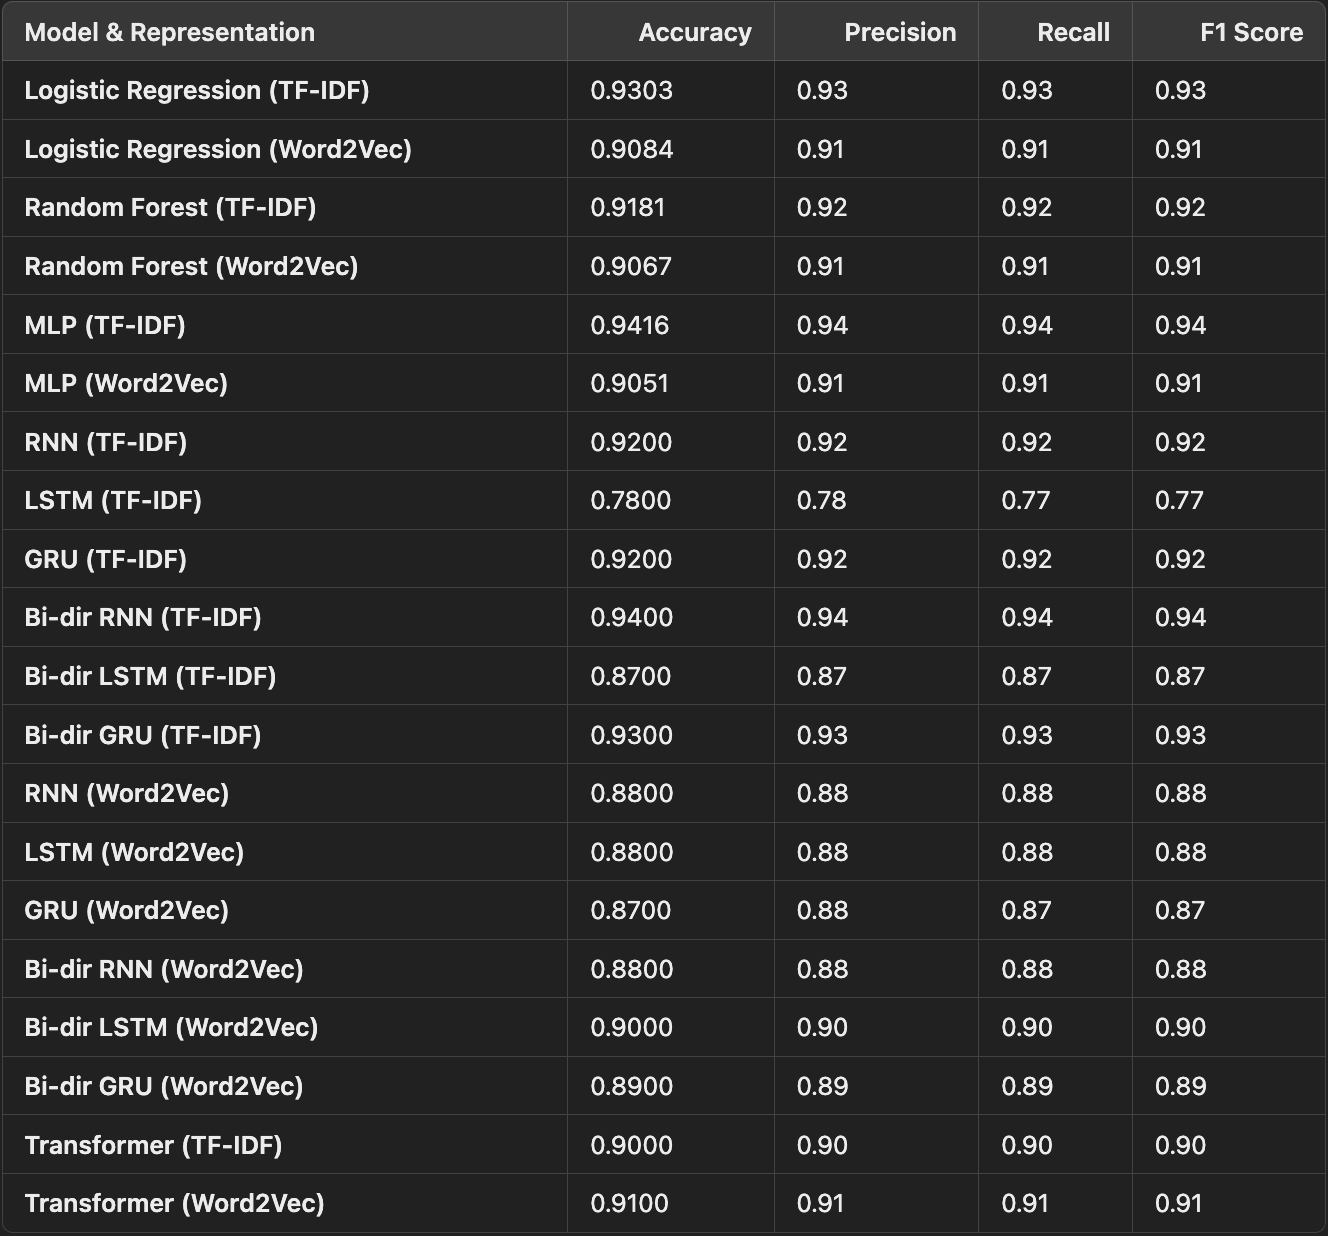

In [13]:
from IPython.display import Image, display
display(Image(filename='/Users/venkatatarunkumarmavillapalli/Desktop/1.png'))

## Traditional Machine Learning Models

### Logistic Regression

- TF-IDF:
Accuracy: 93.03%
Fake News: Precision = 0.92, Recall = 0.94, f1 = 0.93
Real News: Precision = 0.94, Recall = 0.92, f1 = 0.93
Interpretation: The model shows a balanced performance for both classes with a slight edge in recall for fake news and in precision for real news.

- Word2Vec:
Accuracy: 90.84%
Fake News & Real News: Precision, Recall, f1 ≈ 0.91
Interpretation: While the metrics are balanced, the overall scores are about 2 percentage points lower than those achieved with TF-IDF, suggesting a loss in discriminative detail.

### Random Forest
   
- TF-IDF:
Accuracy: 91.81%
Fake News: Precision = 0.91, Recall = 0.92, f1 = 0.92
Real News: Precision = 0.92, Recall = 0.91, f1 = 0.92
Interpretation: Consistently balanced performance, indicating the model effectively distinguishes the classes.

- Word2Vec:
Accuracy: 90.67%
Fake News & Real News: Metrics around 0.90–0.91
Interpretation: Similar to Logistic Regression, Word2Vec based features show a slight drop in performance relative to TF-IDF.

## Neural Network Models

### Multi-Layer Perceptron (MLP)
 
- TF-IDF:
Accuracy: 94.16%
Fake News: Precision = 0.95, Recall = 0.93, f1 = 0.94
Real News: Precision = 0.94, Recall = 0.95, f1 = 0.94
Interpretation: The highest performing model in terms of both overall accuracy and balanced class metrics. The high precision and recall indicate strong reliability in classification.

- Word2Vec:
Accuracy: 90.51%
Fake News & Real News: Metrics around 0.90–0.91
Interpretation: Again, TF-IDF features help achieve superior performance compared to the averaged semantic features from Word2Vec.

- Using TF-IDF:

## Recurrent Neural Network (RNN) Architectures

### Using TF-IDF:

#### Vanilla RNN:
Accuracy: 92% with balanced precision, recall, and f1 around 0.92.

#### LSTM:
Accuracy: 78%
Fake News: Precision = 0.80, Recall = 0.73, f1 = 0.76
Real News: Precision = 0.75, Recall = 0.82, f1 = 0.79
Interpretation: The vanilla LSTM underperforms considerably, indicating possible issues with model tuning or the sequential mismatch with TF-IDF features.

#### GRU:
Accuracy: 92%
Fake News: Precision = 0.94, Recall = 0.90, f1 = 0.92
Real News: Precision = 0.91, Recall = 0.94, f1 = 0.92
Interpretation: GRU achieves strong and balanced performance similar to the vanilla RNN.

#### Bidirectional RNN:
Accuracy: 94%
Fake News & Real News: Metrics around 0.93–0.94
Interpretation: The bidirectional approach improves context capture in both directions, slightly boosting performance.

#### Bidirectional LSTM:
Accuracy: 87%
Fake News: Precision = 0.85, Recall = 0.90, f1 = 0.87
Real News: Precision = 0.89, Recall = 0.85, f1 = 0.87
Interpretation: Although improvements are seen over the unidirectional LSTM, performance remains below other TF-IDF-based models.

#### Bidirectional GRU:
Accuracy: 93%
Fake News & Real News: Metrics around 0.92–0.93
Interpretation: Comparable to the vanilla GRU, bidirectional GRU shows the benefits of two-way context integration.


### Using Word2Vec:
   
#### Vanilla RNN, LSTM, GRU, and Bidirectional RNN:
Accuracies: Approximately 87–88%
Metrics: Consistently in the high 0.87–0.89 range for precision, recall, and f1
Interpretation: Word2Vec based sequential models show lower performance compared to their TF-IDF counterparts, indicating that the loss of discriminative frequency information may affect sequential processing.

#### Bidirectional LSTM & GRU:
Bidirectional LSTM: Accuracy 90%, metrics around 0.90
Bidirectional GRU: Accuracy 89%, metrics around 0.89
Interpretation: Slight improvements are seen with bidirectional architectures, but overall performance remains modest relative to TF-IDF models.

### Transformer-Based Models
   
#### TF-IDF Transformer:
Accuracy: 90%
Fake News: Precision = 0.86, Recall = 0.95, f1 = 0.90
Real News: Precision = 0.95, Recall = 0.85, f1 = 0.89
Interpretation: The model shows a notable trade-off where it achieves very high recall for one class (Fake) at the cost of precision, and vice versa for Real news. This suggests that while the model captures most instances, it may also yield more false positives in one class.

#### Word2Vec Transformer:
Accuracy: 91%
Fake News & Real News: Metrics are balanced around 0.91
Interpretation: The Word2Vec transformer offers competitive performance with a slight edge over the TF-IDF transformer in terms of overall balance.

## Comparative Analysis - Performance by Representation:
   
- TF-IDF consistently outperforms Word2Vec in most classifiers. The richer discriminative power in TF-IDF (due to its emphasis on word frequency and importance) results in higher precision, recall, and f1 scores across traditional models and most deep learning architectures.
  
- Word2Vec’s semantic embeddings, while powerful for capturing relationships between words, tend to average out the frequency information that may be critical for distinguishing subtle differences between fake and real news.
  
- Precision, Recall, and f1 Score Insights - Balanced Metrics: Most models show balanced precision and recall between the Fake and Real classes. This indicates that the dataset is well-calibrated, and the models are not biased toward one class.

- Trade-Offs: In some transformer-based approaches, we observe a trade-off where one class (e.g., Fake) might have high recall but lower precision and vice versa. This indicates the need to potentially tune the decision threshold based on the application context (e.g., whether it is more critical to minimize false negatives or false positives).

- MLP and Bidirectional RNNs with TF-IDF: These models achieve the highest balanced scores (both precision and recall around 0.94), resulting in high f1 scores. This shows that simpler feed-forward and context-aware recurrent architectures can effectively leverage TF-IDF features for this task.

- We tried and implemented to fine tune BERT - Based - Uncased to see how these models perform.

## Conclusions and Recommendations

### Conclusions: 
 
- Representation Matters: TF-IDF, with its emphasis on term importance, generally provides a more discriminative feature set than Word2Vec for this fake/real news classification task. This is clearly reflected in higher accuracy and balanced precision, recall, and f1 scores.

### Model Selection:

- MLP with TF-IDF stands out as the best-performing model, with an overall accuracy of 94.16% and balanced class metrics.
- Bidirectional RNNs/GRUs with TF-IDF also deliver strong performance, underlining the benefit of capturing context in both directions.
- Some deep learning models (notably the TF-IDF LSTM) underperformed, suggesting that the choice of architecture and proper tuning is critical when using non-sequential feature representations.

## Recommendations for Future Work

- Hyperparameter Tuning: Further optimize deep learning models—especially those that underperformed (e.g., LSTM with TF-IDF)—to see if performance gaps can be closed.
- Advanced Embeddings: Explore contextual embeddings (e.g., BERT or GPT-based models) which might combine the strengths of frequency-based and semantic representations.
- Ensemble Methods: Consider combining TF-IDF and Word2Vec representations, or blending multiple models, to harness complementary strengths and potentially boost overall performance.
- Error Analysis: Conduct an in-depth analysis of misclassified examples to better understand if certain news topics or writing styles are more prone to misclassification. This can guide further feature engineering or model adjustments.

# Achievements 

✅ **Preprocessed and structured** the dataset by applying **text cleaning, tokenization, stemming, and lemmatization** for better feature extraction.  
✅ **Implemented multiple text representation techniques**, including **TF-IDF and GloVe embeddings**, to capture both word frequency and contextual meanings.  
✅ **Trained and evaluated various models**, from **traditional machine learning (Logistic Regression, Random Forest)** to **deep learning architectures (CNN, LSTM, BERT)** for fake news classification.  
✅ **Fine-tuned BERT** for contextual text understanding, achieving superior classification performance.  
✅ **Performed hyperparameter tuning** and **model comparison** using **accuracy, precision, recall, F1-score, and AUC-ROC curves** to ensure robustness.  
✅ **Demonstrated deep learning models outperform traditional approaches**, highlighting the effectiveness of **transformer-based models in fake news detection**.  
✅ **Proposed an automated fake news detection pipeline** for potential integration into **fact-checking systems and social media platforms** to combat misinformation.  



# References


| **Topic**                             | **Reference Website**                                      | **Description**                                                                                   |
|---------------------------------------|-----------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| TF-IDF                                | [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf) | Comprehensive guide on implementing TF-IDF in Python using Scikit-learn.                        |
| GloVe Vectors                         | [GloVe Official Website](https://nlp.stanford.edu/projects/glove/) | Information and resources for GloVe word embeddings, including pre-trained models.              |
| Logistic Regression                   | [Towards Data Science - Logistic Regression](https://towardsdatascience.com/logistic-regression-in-python-using-scikit-learn-3b9f8c4f2b93) | Tutorial on implementing logistic regression with Scikit-learn.                                  |
| Random Forest                         | [Random Forests - Scikit-learn Documentation](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) | Detailed explanation and implementation guide for Random Forests in Scikit-learn.                |
| Multi-Layer Perceptron (MLP)         | [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) | Book that covers MLPs and their applications in text classification.                             |
| Convolutional Neural Networks (CNN)   | [KDNuggets - CNN for Text Classification](https://www.kdnuggets.com/2020/10/cnn-text-classification.html) | Overview of using CNNs for text classification tasks.                                            |
| Recurrent Neural Networks (RNN)       | [Understanding LSTMs - Colah's Blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) | In-depth explanation of RNNs and their variants, including LSTMs.                               |
| Long Short-Term Memory (LSTM) Networks | [Towards Data Science - LSTM Networks](https://towardsdatascience.com/lstm-neural-network-architecture-for-time-series-prediction-2d4d8a4e0c0a) | Tutorial on LSTM networks and their applications in sequential data analysis.                     |
| Transformers                           | [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/) | Visual explanation of the Transformer architecture and its components.                           |
| BERT                                   | [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) | Original research paper introducing BERT, detailing its architecture and performance on NLP tasks. |



# Thank You!
We express our sincere gratitude to the data providers on Kaggle. Most importantly, we extend our heartfelt thanks to our professors for inspiring and fostering the curiosity that drove us to explore this project.